In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

### traitement du jeu de données

In [266]:
data = pd.read_excel('C:/Users/MAXIME/Tourist accomodation From 2007.xlsx')

In [267]:
mask_h04=data["H04"].str.contains("income")

In [268]:
mask_h0=data["H04"].str.contains("Income")

In [269]:
df1=data[mask_h04]

In [270]:
df2=data[mask_h0]

In [271]:
data=pd.concat([df1, df2])

<Axes: >

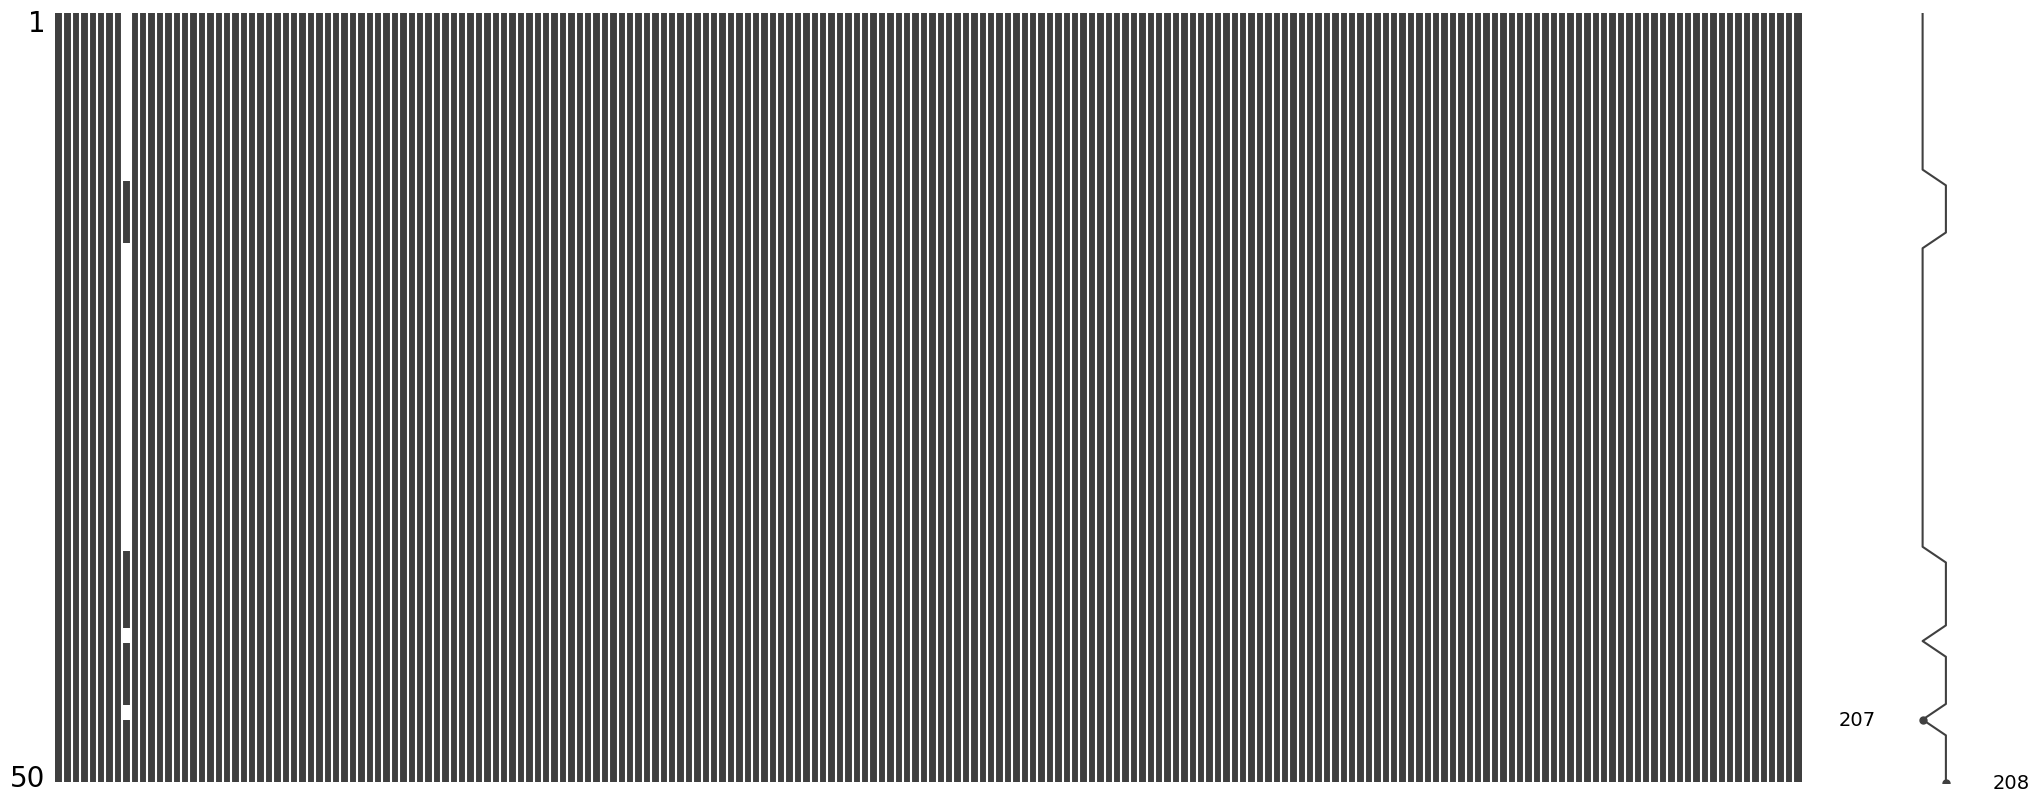

In [272]:
import missingno as msno
%matplotlib inline
msno.matrix(data)

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 30 to 64
Columns: 208 entries, H01 to MO072023
dtypes: float64(199), object(9)
memory usage: 81.6+ KB


In [274]:
data.tail()

H01                   H02          H03  \
60  P6410  Tourism Accomodation  TOT_BAR_D11   
61  P6410  Tourism Accomodation  HOT_BAR_D11   
62  P6410  Tourism Accomodation  CAR_BAR_D11   
63  P6410  Tourism Accomodation  GUE_BAR_D11   
64  P6410  Tourism Accomodation  OTH_BAR_D11   

                                                  H04             H15  \
60  Income from restaurant and bar sales - Total i...  Current prices   
61      Income from restaurant and bar sales - Hotels  Current prices   
62  Income from restaurant and bar sales - Caravan...  Current prices   
63  Income from restaurant and bar sales - Guest h...  Current prices   
64  Income from restaurant and bar sales - Other a...  Current prices   

                    H16        H17      H25  \
60  Seasonally adjusted  R million  MONTHLY   
61  Seasonally adjusted  R million  MONTHLY   
62  Seasonally adjusted  R million  MONTHLY   
63  Seasonally adjusted  R million  MONTHLY   
64  Seasonally adjusted  R million  MONTHLY   

                                        _LABEL_  MO012007  ...  MO102022  \
60                                          NaN     355.6  ...     609.8   
61  Table D 11:  Final Seasonally Adjusted Data     311.3  ...     538.9   
62  Table D 11:  Final Seasonally Adjusted Data       0.4  ...       0.5   
63  Table D 11:  Final Seasonally Adjusted Data       6.6  ...      19.3   
64  Table D 11:  Final Seasonally Adjusted Data      37.3  ...      51.1   

    MO112022  MO122022  MO012023  MO022023  MO032023  MO042023  MO052023  \
60     557.6     667.1     654.8     606.2     638.4     648.4     663.9   
61     494.0     600.4     581.8     539.4     566.8     564.1     577.3   
62       0.5       0.9       1.4       0.5       0.6       0.5       0.6   
63      18.1      18.2      18.5      18.2      22.0      21.9      26.4   
64      45.0      47.6      53.1      48.2      48.9      61.8      59.6   

    MO062023  MO072023  
60     703.7     737.3  
61     611.6     652.5  
62       0.9       0.3  
63      26.2      20.2  
64      65.0      64.3  

[5 rows x 208 columns]

In [275]:
df=data[['H04','MO012007','MO022007','MO032007','MO042007','MO052007','MO062007','MO072007','MO082007','MO092007','MO102007','MO112007','MO122007','MO012008','MO022008','MO032008','MO042008','MO052008','MO062008','MO072008','MO082008','MO092008','MO102008','MO112008','MO122008','MO012009','MO022009','MO032009','MO042009','MO052009','MO062009','MO072009','MO082009','MO092009','MO102009','MO112009','MO122009','MO012010','MO022010','MO032010','MO042010','MO052010','MO062010','MO072010','MO082010','MO092010','MO102010','MO112010','MO122010','MO012011','MO022011','MO032011','MO042011','MO052011','MO062011','MO072011','MO082011','MO092011','MO102011','MO112011','MO122011','MO012012','MO022012','MO032012','MO042012','MO052012','MO062012','MO072012','MO082012','MO092012','MO102012','MO112012','MO122012','MO012013','MO022013','MO032013','MO042013','MO052013','MO062013','MO072013','MO082013','MO092013','MO102013','MO112013','MO122013','MO012014','MO022014','MO032014','MO042014','MO052014','MO062014','MO072014','MO082014','MO092014','MO102014','MO112014','MO122014','MO012015','MO022015','MO032015','MO042015','MO052015','MO062015','MO072015','MO082015','MO092015','MO102015','MO112015','MO122015','MO012016','MO022016','MO032016','MO042016','MO052016','MO062016','MO072016','MO082016','MO092016','MO102016','MO112016','MO122016','MO012017','MO022017','MO032017','MO042017','MO052017','MO062017','MO072017','MO082017','MO092017','MO102017','MO112017','MO122017','MO012018','MO022018','MO032018','MO042018','MO052018','MO062018','MO072018','MO082018','MO092018','MO102018','MO112018','MO122018','MO012019','MO022019','MO032019','MO042019','MO052019','MO062019','MO072019','MO082019','MO092019','MO102019','MO112019','MO122019','MO012020','MO022020','MO032020','MO042020','MO052020','MO062020','MO072020','MO082020','MO092020','MO102020','MO112020','MO122020','MO012021','MO022021','MO032021','MO042021','MO052021','MO062021','MO072021','MO082021','MO092021','MO102021','MO112021','MO122021','MO012022','MO022022','MO032022','MO042022','MO052022','MO062022','MO072022','MO082022','MO092022','MO102022','MO112022','MO122022','MO012023','MO022023','MO032023','MO042023','MO052023','MO062023','MO072023']]

In [276]:
df=df.set_index('H04')

In [277]:
df.tail()

MO012007  MO022007  \
H04                                                                      
Income from restaurant and bar sales - Total in...     355.6     353.1   
Income from restaurant and bar sales - Hotels          311.3     316.3   
Income from restaurant and bar sales - Caravan ...       0.4       0.6   
Income from restaurant and bar sales - Guest ho...       6.6       6.8   
Income from restaurant and bar sales - Other ac...      37.3      29.3   

                                                    MO032007  MO042007  \
H04                                                                      
Income from restaurant and bar sales - Total in...     367.1     346.7   
Income from restaurant and bar sales - Hotels          331.4     309.5   
Income from restaurant and bar sales - Caravan ...       0.3       0.5   
Income from restaurant and bar sales - Guest ho...       6.5       7.3   
Income from restaurant and bar sales - Other ac...      28.9      29.5   

                                                    MO052007  MO062007  \
H04                                                                      
Income from restaurant and bar sales - Total in...     368.3     350.6   
Income from restaurant and bar sales - Hotels          331.0     313.1   
Income from restaurant and bar sales - Caravan ...       0.4       0.4   
Income from restaurant and bar sales - Guest ho...       7.3       6.7   
Income from restaurant and bar sales - Other ac...      29.7      30.4   

                                                    MO072007  MO082007  \
H04                                                                      
Income from restaurant and bar sales - Total in...     345.2     373.3   
Income from restaurant and bar sales - Hotels          310.0     333.6   
Income from restaurant and bar sales - Caravan ...       0.4       0.5   
Income from restaurant and bar sales - Guest ho...       7.5       8.1   
Income from restaurant and bar sales - Other ac...      27.4      31.0   

                                                    MO092007  MO102007  ...  \
H04                                                                     ...   
Income from restaurant and bar sales - Total in...     382.1     387.6  ...   
Income from restaurant and bar sales - Hotels          340.8     345.6  ...   
Income from restaurant and bar sales - Caravan ...       0.4       0.4  ...   
Income from restaurant and bar sales - Guest ho...       8.5       8.9  ...   
Income from restaurant and bar sales - Other ac...      32.4      32.7  ...   

                                                    MO102022  MO112022  \
H04                                                                      
Income from restaurant and bar sales - Total in...     609.8     557.6   
Income from restaurant and bar sales - Hotels          538.9     494.0   
Income from restaurant and bar sales - Caravan ...       0.5       0.5   
Income from restaurant and bar sales - Guest ho...      19.3      18.1   
Income from restaurant and bar sales - Other ac...      51.1      45.0   

                                                    MO122022  MO012023  \
H04                                                                      
Income from restaurant and bar sales - Total in...     667.1     654.8   
Income from restaurant and bar sales - Hotels          600.4     581.8   
Income from restaurant and bar sales - Caravan ...       0.9       1.4   
Income from restaurant and bar sales - Guest ho...      18.2      18.5   
Income from restaurant and bar sales - Other ac...      47.6      53.1   

                                                    MO022023  MO032023  \
H04                                                                      
Income from restaurant and bar sales - Total in...     606.2     638.4   
Income from restaurant and bar sales - Hotels          539.4     566.8   
Income from restaurant and bar sales - Caravan ...       0.5       0.6   
Income from re

In [278]:
df=df.T

In [279]:
df.head()

H04       Other income - Total industry  Other income - Hotels  \
MO012007                          341.8                  329.5   
MO022007                          388.0                  376.3   
MO032007                          466.7                  450.3   
MO042007                          405.2                  389.7   
MO052007                          383.7                  373.3   

H04       Other income - Caravan parks and camping sites  \
MO012007                                             0.9   
MO022007                                             0.9   
MO032007                                             1.5   
MO042007                                             0.9   
MO052007                                             1.5   

H04       Other income - Guest houses and guest farms  \
MO012007                                          5.9   
MO022007                                          5.4   
MO032007                                          7.1   
MO042007                                          7.1   
MO052007                                          4.2   

H04       Other income - Other accommodation  Total income - Total industry  \
MO012007                                 5.5                         1850.5   
MO022007                                 5.4                         2067.3   
MO032007                                 7.8                         2241.5   
MO042007                                 7.5                         1958.3   
MO052007                                 4.7                         1856.8   

H04       Total income - Hotels  \
MO012007                 1463.3   
MO022007                 1704.8   
MO032007                 1839.4   
MO042007                 1583.8   
MO052007                 1565.1   

H04       Total income - Caravan parks and camping sites  \
MO012007                                             5.0   
MO022007                                             4.4   
MO032007                                             5.6   
MO042007                                             5.9   
MO052007                                             4.7   

H04       Total income - Guest houses and guest farms  \
MO012007                                         88.0   
MO022007                                         81.8   
MO032007                                        100.0   
MO042007                                         74.1   
MO052007                                         58.4   

H04       Total income - Other accommodation  ...  \
MO012007                               294.2  ...   
MO022007                               276.3  ...   
MO032007                               296.5  ...   
MO042007                               294.5  ...   
MO052007                               228.6  ...   

H04       Income from accommodation - Total industry  \
MO012007                                      1196.5   
MO022007                                      1238.8   
MO032007                                      1254.3   
MO042007                                      1255.6   
MO052007                                      1262.7   

H04       Income from accommodation - Hotels  \
MO012007                               883.5   
MO022007                               925.8   
MO032007                               935.2   
MO042007                               950.9   
MO052007                               968.6   

H04       Income from accommodation - Caravan parks and camping sites  \
MO012007                                                3.6             
MO022007                                                3.9             
MO032007                                                3.7             
MO042007                                                3.9             
MO052007                                                4.6             

H04       Income from accommodation - Guest houses and guest farms  \
MO012007                                               

In [280]:
import datetime

def transformer(text:str):
    year=text[4:]
    month=text[2:4]
    return f"{year}-{month}"


In [281]:
df.index=[transformer(text) for text in df.index]
df.index

Index(['2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06',
       '2007-07', '2007-08', '2007-09', '2007-10',
       ...
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06', '2023-07'],
      dtype='object', length=199)

In [282]:
df['DATE']=df.index
df['DATE']=pd.to_datetime(df['DATE'],infer_datetime_format=True)

C:\Users\MAXIME\AppData\Local\Temp\ipykernel_2988\2433539553.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['DATE']=pd.to_datetime(df['DATE'],infer_datetime_format=True)


In [283]:
df.rename(columns={"MOIS":'DATE'},inplace=True)
df=df.set_index('DATE')

In [284]:
df.rename(columns={"H04":'MOIS'},inplace=True)

In [285]:
df.head()

H04         Other income - Total industry  Other income - Hotels  \
DATE                                                               
2007-01-01                          341.8                  329.5   
2007-02-01                          388.0                  376.3   
2007-03-01                          466.7                  450.3   
2007-04-01                          405.2                  389.7   
2007-05-01                          383.7                  373.3   

H04         Other income - Caravan parks and camping sites  \
DATE                                                         
2007-01-01                                             0.9   
2007-02-01                                             0.9   
2007-03-01                                             1.5   
2007-04-01                                             0.9   
2007-05-01                                             1.5   

H04         Other income - Guest houses and guest farms  \
DATE                                                      
2007-01-01                                          5.9   
2007-02-01                                          5.4   
2007-03-01                                          7.1   
2007-04-01                                          7.1   
2007-05-01                                          4.2   

H04         Other income - Other accommodation  Total income - Total industry  \
DATE                                                                            
2007-01-01                                 5.5                         1850.5   
2007-02-01                                 5.4                         2067.3   
2007-03-01                                 7.8                         2241.5   
2007-04-01                                 7.5                         1958.3   
2007-05-01                                 4.7                         1856.8   

H04         Total income - Hotels  \
DATE                                
2007-01-01                 1463.3   
2007-02-01                 1704.8   
2007-03-01                 1839.4   
2007-04-01                 1583.8   
2007-05-01                 1565.1   

H04         Total income - Caravan parks and camping sites  \
DATE                                                         
2007-01-01                                             5.0   
2007-02-01                                             4.4   
2007-03-01                                             5.6   
2007-04-01                                             5.9   
2007-05-01                                             4.7   

H04         Total income - Guest houses and guest farms  \
DATE                                                      
2007-01-01                                         88.0   
2007-02-01                                         81.8   
2007-03-01                                        100.0   
2007-04-01                                         74.1   
2007-05-01                                         58.4   

H04         Total income - Other accommodation  ...  \
DATE                                            ...   
2007-01-01                               294.2  ...   
2007-02-01                               276.3  ...   
2007-03-01                               296.5  ...   
2007-04-01                               294.5  ...   
2007-05-01                               228.6  ...   

H04         Income from accommodation - Total industry  \
DATE                                                     
2007-01-01                                      1196.5   
2007-02-01                                      1238.8   
2007-03-01                                      1254.3   
2007-04-01                                      1255.6   
2007-05-01                                      1262.7   

H04         Income from accommodation - Hotels  \
DATE                                             
2007-01-01                               883.5   
2007-02-01                               925.8   
2007

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199 entries, 2007-01-01 to 2023-07-01
Data columns (total 50 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Other income - Total industry                                           199 non-null    float64
 1   Other income - Hotels                                                   199 non-null    float64
 2   Other income - Caravan parks and camping sites                          199 non-null    float64
 3   Other income - Guest houses and guest farms                             199 non-null    float64
 4   Other income - Other accommodation                                      199 non-null    float64
 5   Total income - Total industry                                           199 non-null    float64
 6   Total income - Hotels                                          

In [287]:
df.isnull().sum()

H04
Other income - Total industry                                             0
Other income - Hotels                                                     0
Other income - Caravan parks and camping sites                            0
Other income - Guest houses and guest farms                               0
Other income - Other accommodation                                        0
Total income - Total industry                                             0
Total income - Hotels                                                     0
Total income - Caravan parks and camping sites                            0
Total income - Guest houses and guest farms                               0
Total income - Other accommodation                                        0
Other income - Total industry                                             0
Other income - Hotels                                                     0
Other income - Caravan parks and camping sites                            0
Other in

### graphiques

In [288]:
tourism=df

In [289]:
df = df.loc[:, ~df.columns[::-1].duplicated()[::-1]]
df.shape

(199, 25)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


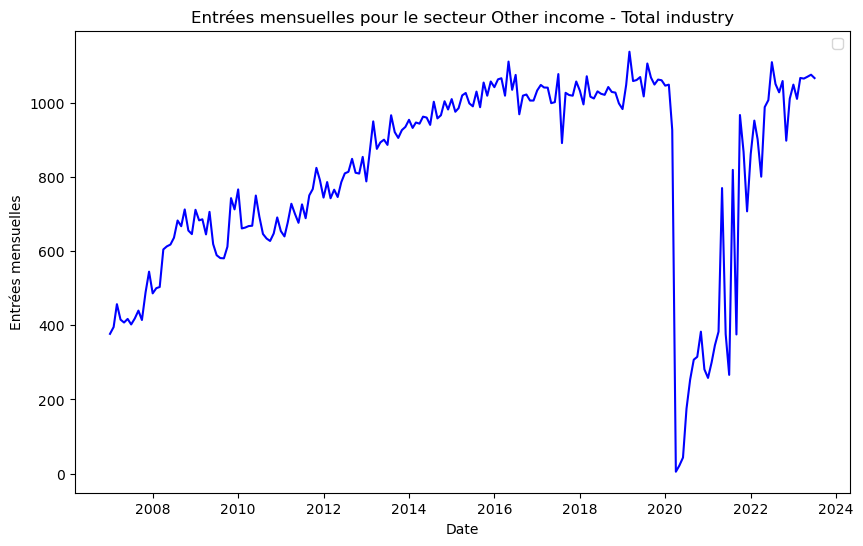

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


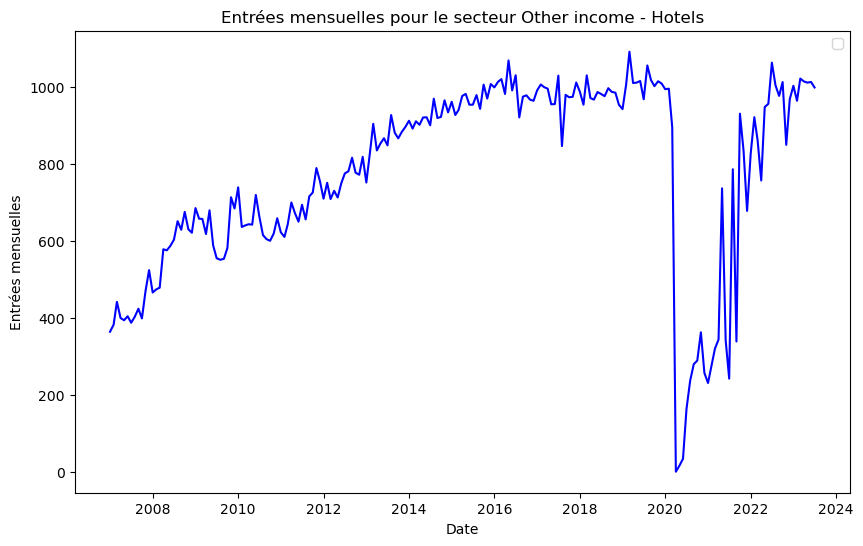

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


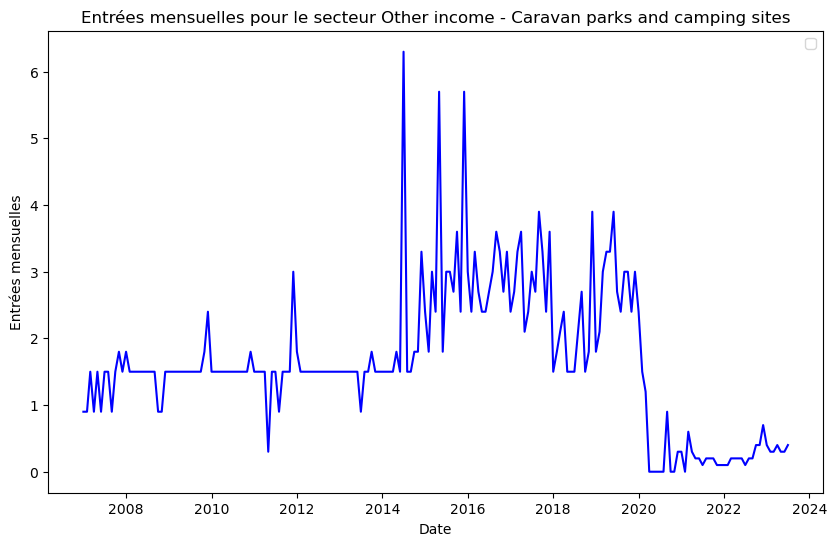

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


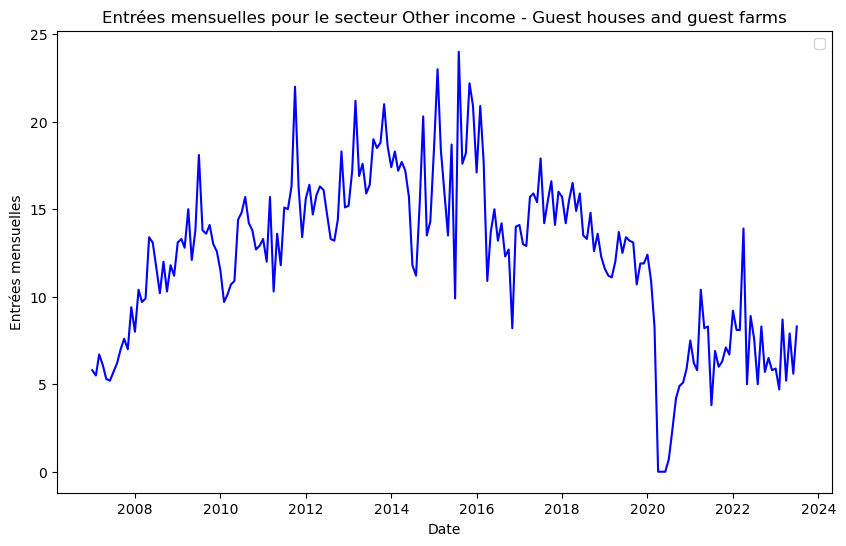

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


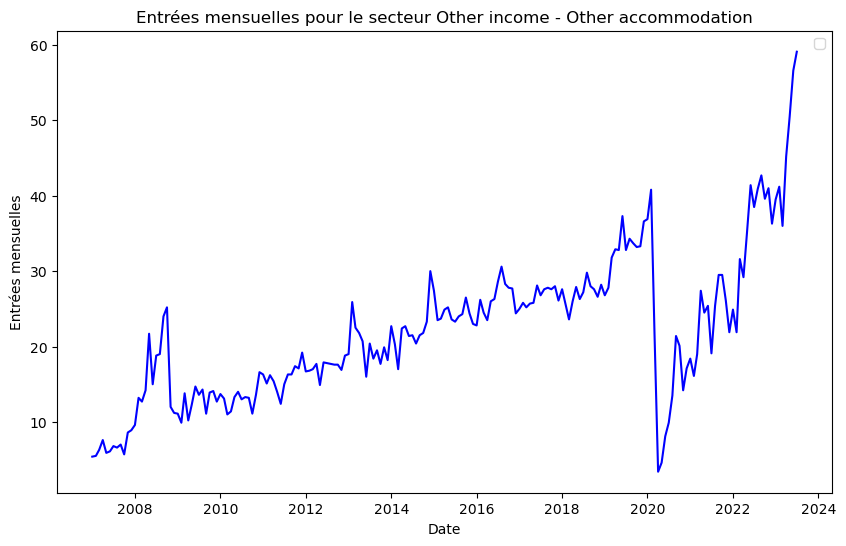

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


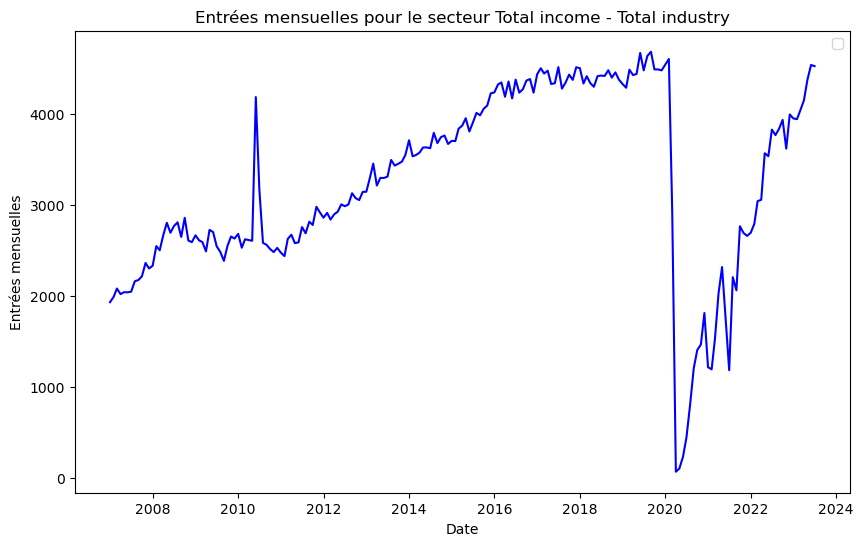

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


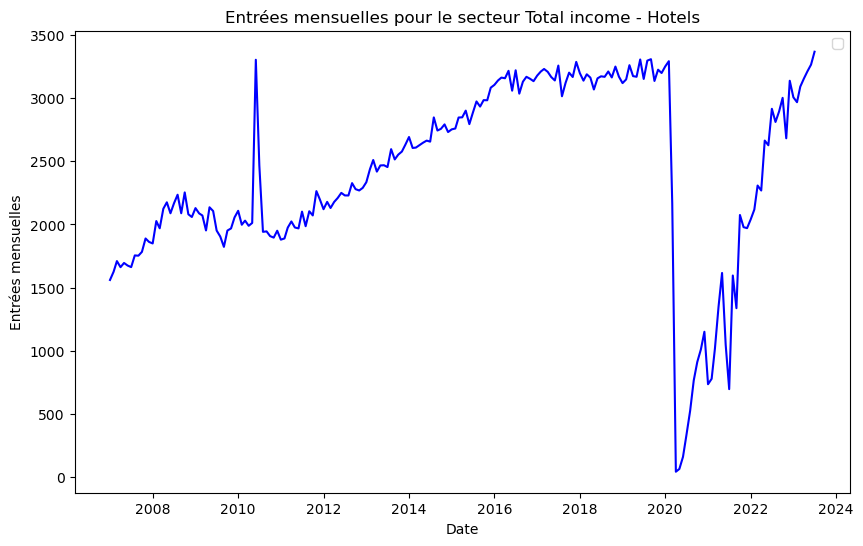

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


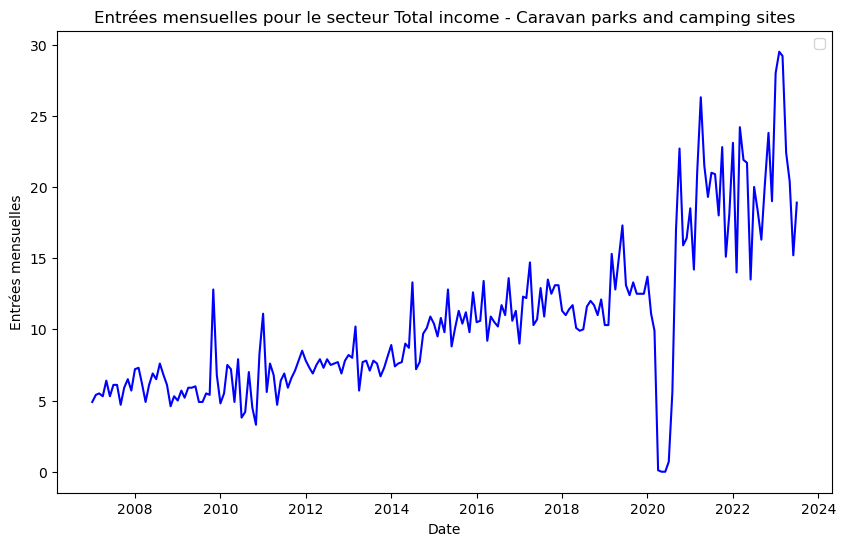

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


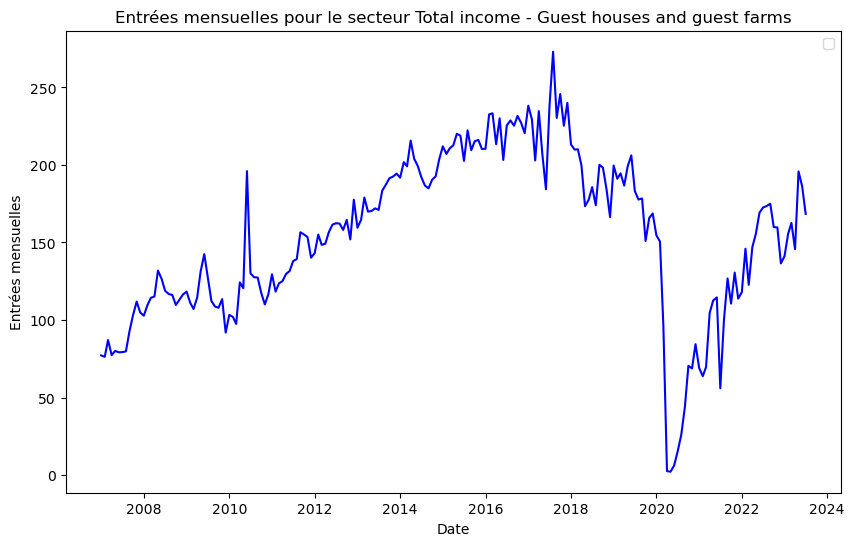

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


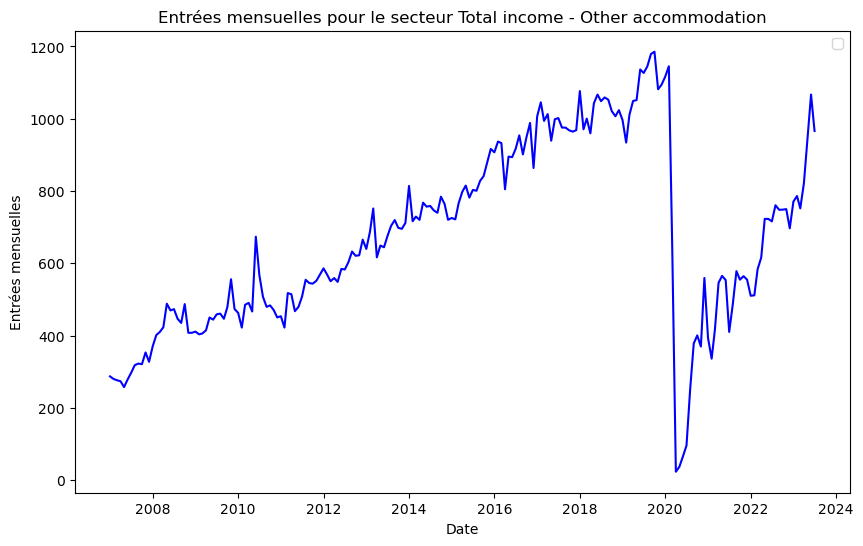

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


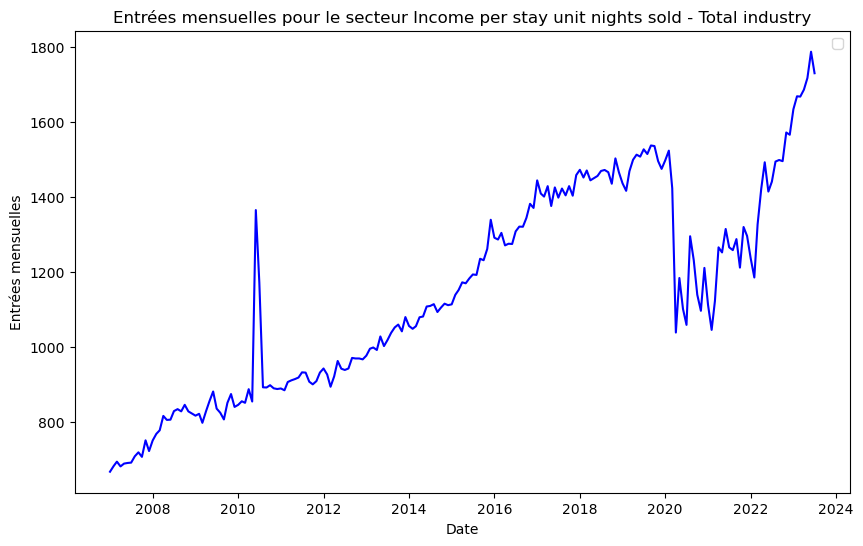

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


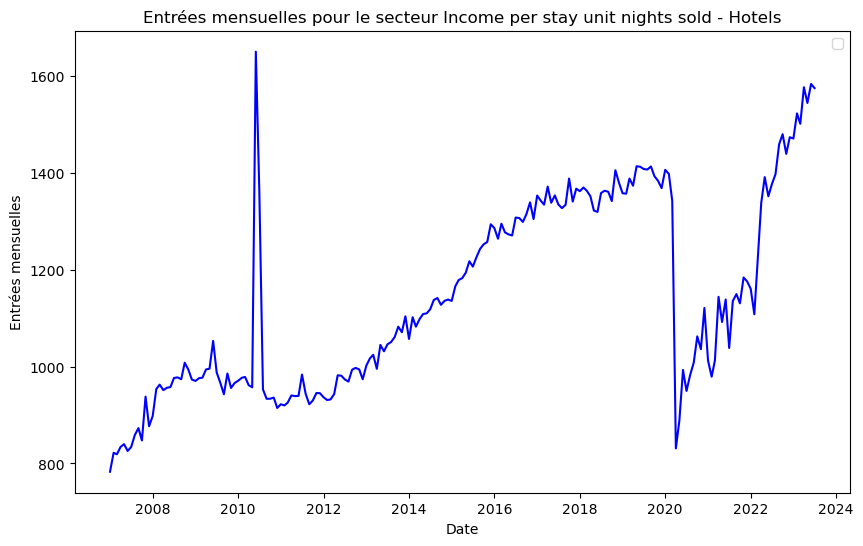

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


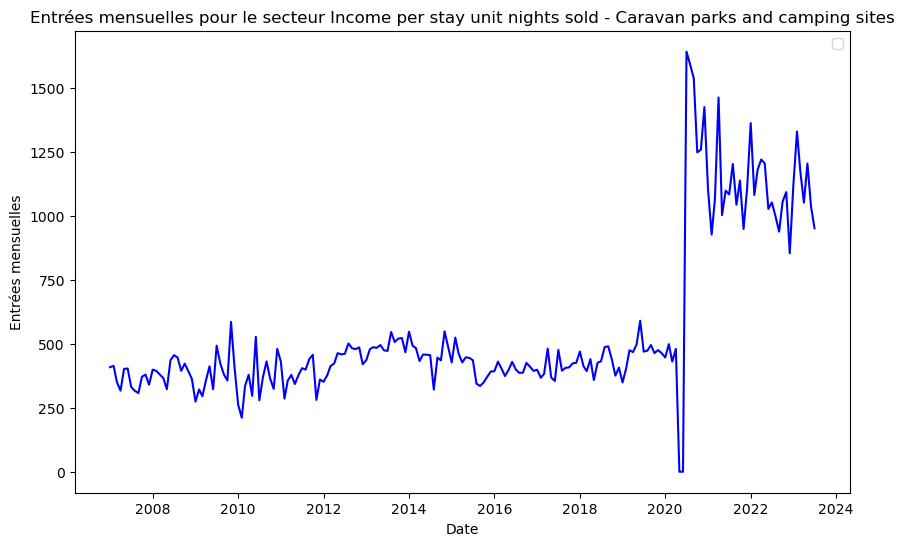

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


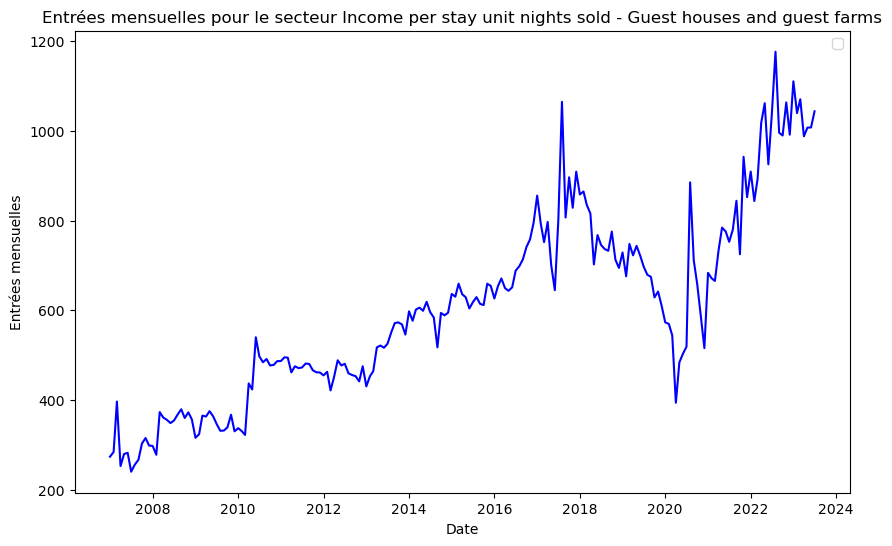

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


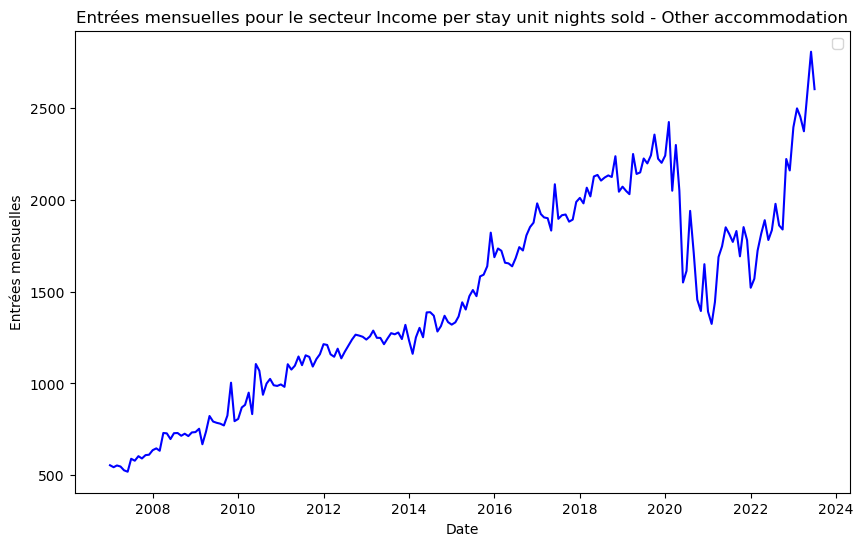

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


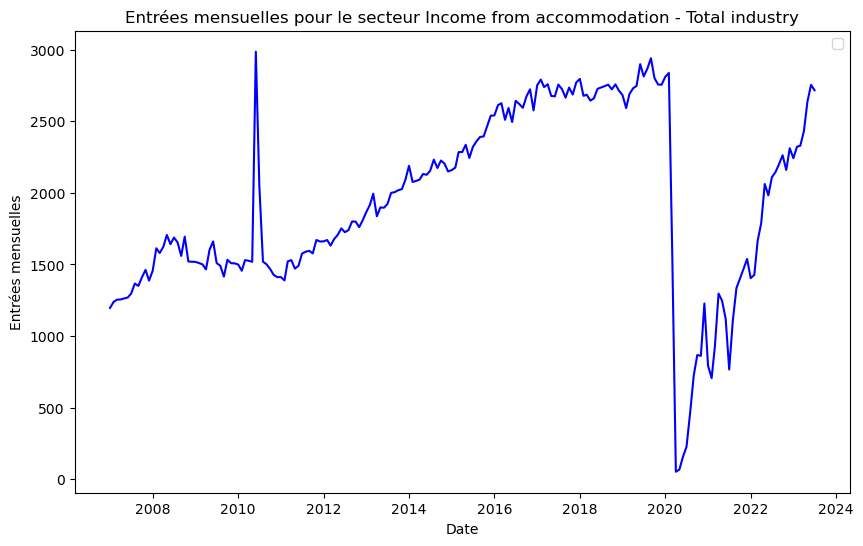

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


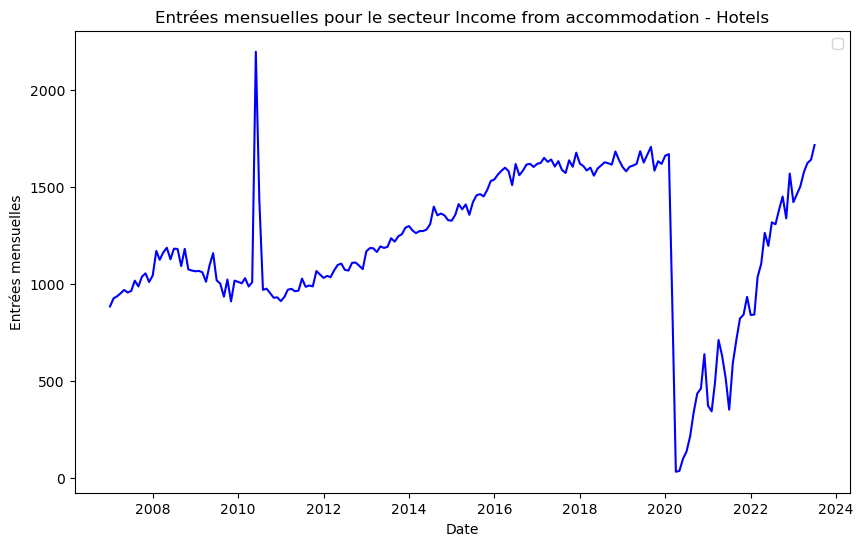

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


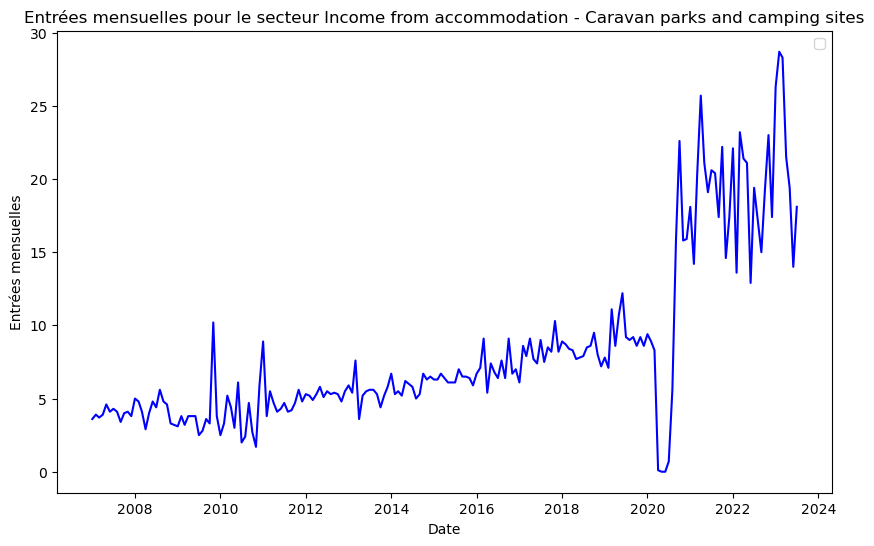

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


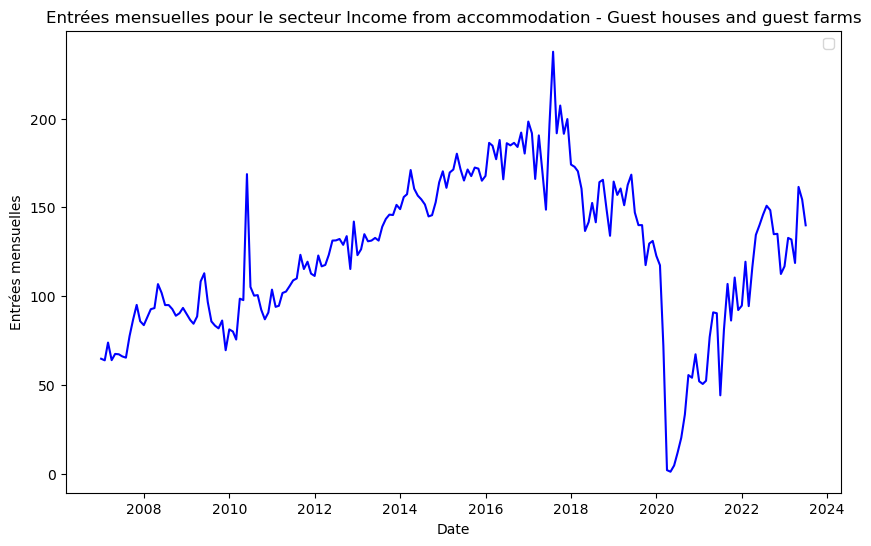

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


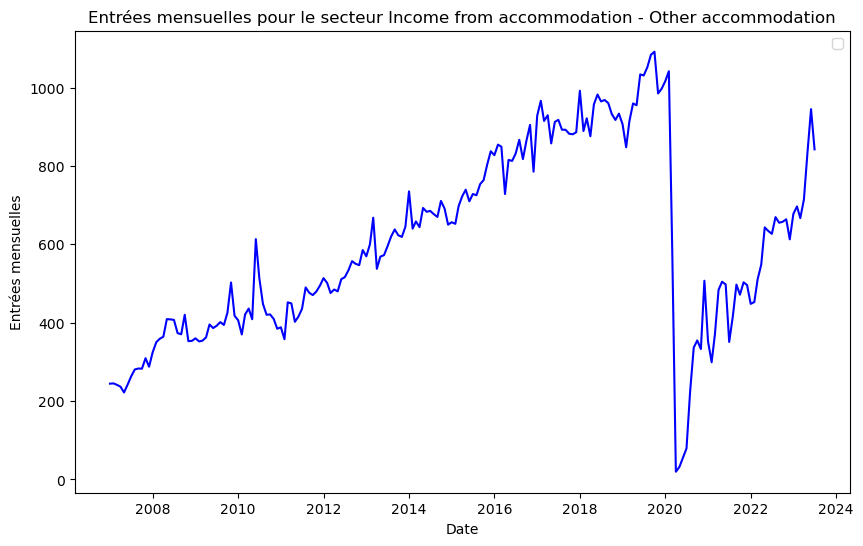

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


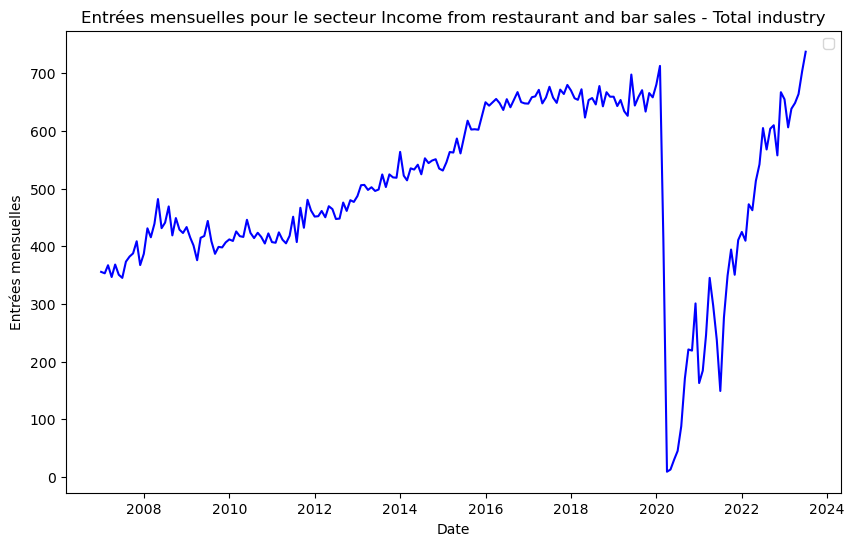

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


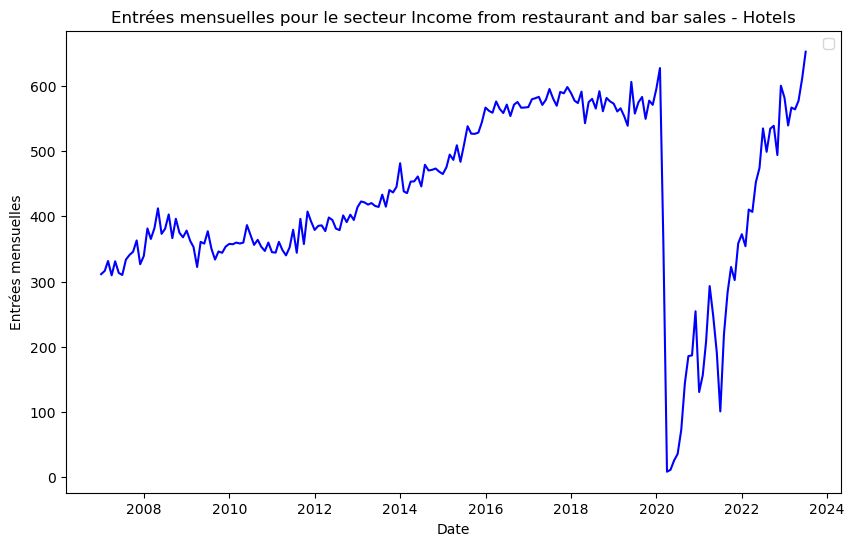

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


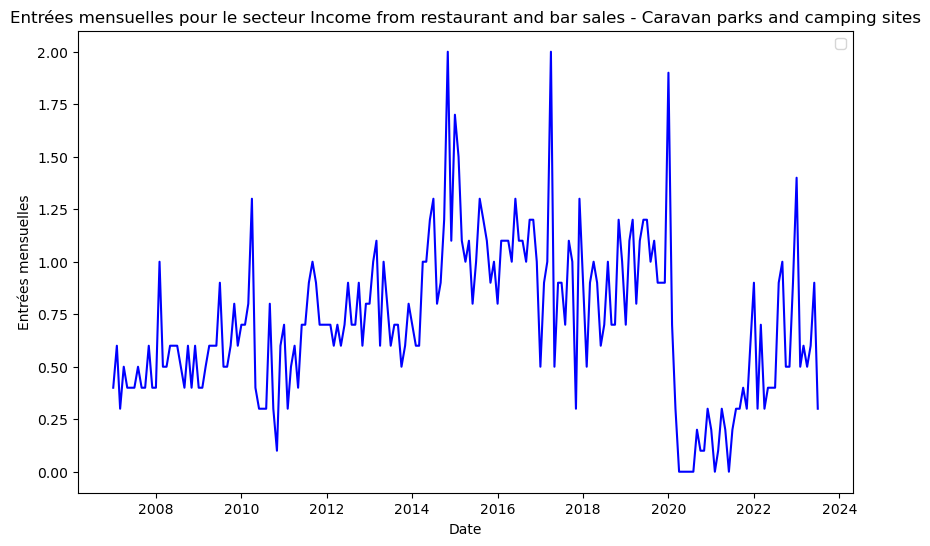

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


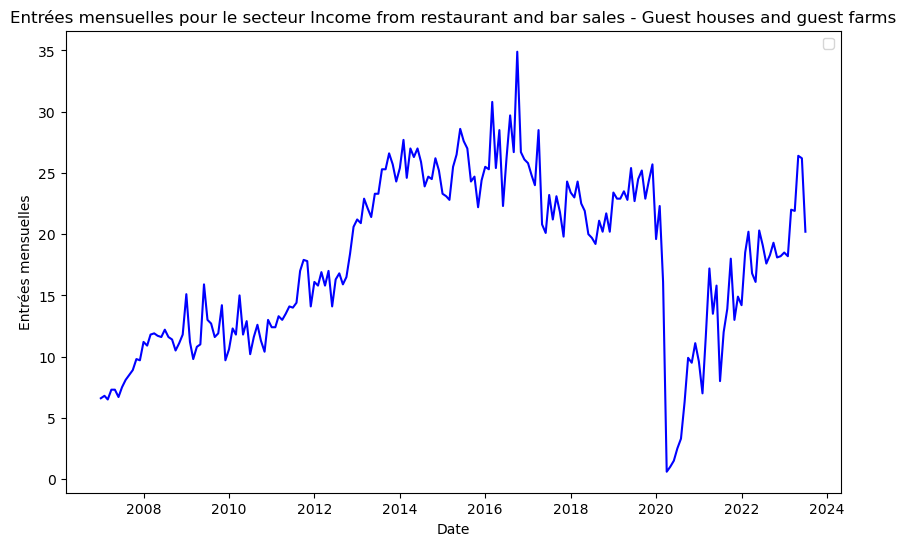

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


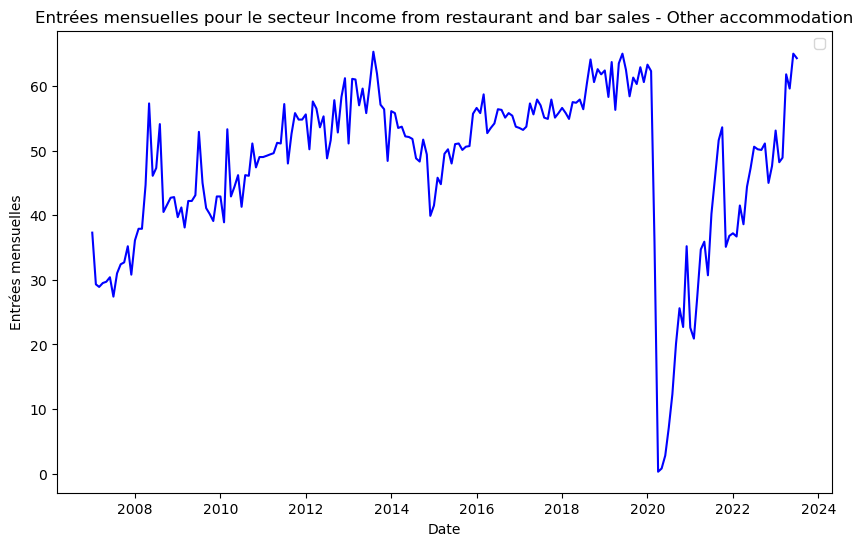

In [290]:
secteurs = df.columns[0:]  # Assurez-vous que les données commencent à partir de la 4e colonne
for secteur in secteurs:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[f'{secteur}'], color='blue')
    plt.title(f'Entrées mensuelles pour le secteur {secteur}')
    plt.xlabel('Date')
    plt.ylabel('Entrées mensuelles')
    plt.legend()
    plt.show()

### normalisation

In [291]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for s in secteurs:
    d = df[s].values
    d = d.astype('float32')
    d = d.reshape(-1, 1)
    d = scaler.fit_transform(d)
    print("Longueur de la colonne existante:", len(df[s]))
    print("Longueur des valeurs normalisées:", len(d))
    df[s] = d

Longueur de la colonne existante: 199
Longueur des valeurs normalisées: 199
Longueur de la colonne existante: 199
Longueur des valeurs normalisées: 199
Longueur de la colonne existante: 199
Longueur des valeurs normalisées: 199
Longueur de la colonne existante: 199
Longueur des valeurs normalisées: 199
Longueur de la colonne existante: 199
Longueur des valeurs normalisées: 199
Longueur de la colonne existante: 199
Longueur des valeurs normalisées: 199
Longueur de la colonne existante: 199
Longueur des valeurs normalisées: 199
Longueur de la colonne existante: 199
Longueur des valeurs normalisées: 199
Longueur de la colonne existante: 199
Longueur des valeurs normalisées: 199
Longueur de la colonne existante: 199
Longueur des valeurs normalisées: 199
Longueur de la colonne existante: 199
Longueur des valeurs normalisées: 199
Longueur de la colonne existante: 199
Longueur des valeurs normalisées: 199
Longueur de la colonne existante: 199
Longueur des valeurs normalisées: 199
Longueur de 

C:\Users\MAXIME\AppData\Local\Temp\ipykernel_2988\3148339441.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s] = d
C:\Users\MAXIME\AppData\Local\Temp\ipykernel_2988\3148339441.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s] = d
C:\Users\MAXIME\AppData\Local\Temp\ipykernel_2988\3148339441.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [292]:
df

H04         Other income - Total industry  Other income - Hotels  \
DATE                                                               
2007-01-01                      -1.721391              -1.691779   
2007-02-01                      -1.648268              -1.615695   
2007-03-01                      -1.403068              -1.370486   
2007-04-01                      -1.568787              -1.543745   
2007-05-01                      -1.599785              -1.568142   
...                                   ...                    ...   
2023-03-01                       1.021117               1.025771   
2023-04-01                       1.014759               0.994759   
2023-05-01                       1.034232               0.982354   
2023-06-01                       1.056089               0.989383   
2023-07-01                       1.019925               0.930252   

H04         Other income - Caravan parks and camping sites  \
DATE                                                         
2007-01-01                                       -0.692928   
2007-02-01                                       -0.692928   
2007-03-01                                       -0.141725   
2007-04-01                                       -0.692928   
2007-05-01                                       -0.141725   
...                                                    ...   
2023-03-01                                       -1.244131   
2023-04-01                                       -1.152264   
2023-05-01                                       -1.244131   
2023-06-01                                       -1.244131   
2023-07-01                                       -1.152264   

H04         Other income - Guest houses and guest farms  \
DATE                                                      
2007-01-01                                    -1.398568   
2007-02-01                                    -1.462602   
2007-03-01                                    -1.206465   
2007-04-01                                    -1.334533   
2007-05-01                                    -1.505292   
...                                                 ...   
2023-03-01                                    -0.779568   
2023-04-01                                    -1.526637   
2023-05-01                                    -0.950327   
2023-06-01                                    -1.441257   
2023-07-01                                    -0.864947   

H04         Other income - Other accommodation  Total income - Total industry  \
DATE                                                                            
2007-01-01                           -1.727509                      -1.309973   
2007-02-01                           -1.717115                      -1.252065   
2007-03-01                           -1.633962                      -1.161223   
2007-04-01                           -1.498839                      -1.221917   
2007-05-01                           -1.675539                      -1.200923   
...                                        ...                            ...   
2023-03-01                            1.453084                       0.785263   
2023-04-01                            2.409341                       0.894910   
2023-05-01                            2.960228                       1.119776   
2023-06-01                            3.594268                       1.281561   
2023-07-01                            3.854120                       1.268824   

H04         Total income - Hotels  \
DATE                                
2007-01-01              -1.180455   
2007-02-01              -1.089141   
2007-03-01              -0.972671   
2007-04-01              -1.039523   
2007-05-01              -0.993241   
...                           ...   
2023-03-01               0.947981   
2023-04-01               1.036932   
2023-05-01               1.116015   
2023-06-01               1.190234   
2023-07-01               1.332278   

H04 

### creation d'un echantillon d'entrainement et de test

In [293]:
### nous devons transformer les données au bon format

In [294]:
from keras.preprocessing.sequence import TimeseriesGenerator
models=[]
for secteur in secteurs:
    train_size=int(len(df[secteur])* 0.80)
    test_size=len(df[secteur]) - train_size
    train, test=df[secteur][:-test_size], df[secteur][-test_size:]
    seq_size=lengh=12
    batch_size=1
    train_generator=TimeseriesGenerator(train, train, length=lengh, stride=1, batch_size=batch_size)
    #print("le nombre d'observation dans l'echantillon de train est = ",len(train))
    #print("le nombre d'observation dans l'echantillon de training generator est = ",len(train_generator))
    models.append({'secteur':secteur,
                  'train_generator':train_generator,
                  'train_data':train,
                  'test_data':test})

In [295]:
x, y=models[0]['train_generator'][0]
print(x)
print(y)

[[-1.7213913 -1.6482683 -1.403068  -1.5687869 -1.5997846 -1.5612361
  -1.6204499 -1.5564673 -1.4722168 -1.5727609 -1.2774872 -1.054939 ]]
[-1.2874223]


In [296]:
seq_size=lengh=12
for m in models:
    test_generator = TimeseriesGenerator(
        m["test_data"],
        m["test_data"],
        stride=1,
        length = lengh,
        batch_size = batch_size
    )
    m["test_generator"] = test_generator
    
    print("Nombre d'observation du train", len(m["test_data"]))
    print("Nombre d'observation train_generator", len(test_generator))

Nombre d'observation du train 40
Nombre d'observation train_generator 28
Nombre d'observation du train 40
Nombre d'observation train_generator 28
Nombre d'observation du train 40
Nombre d'observation train_generator 28
Nombre d'observation du train 40
Nombre d'observation train_generator 28
Nombre d'observation du train 40
Nombre d'observation train_generator 28
Nombre d'observation du train 40
Nombre d'observation train_generator 28
Nombre d'observation du train 40
Nombre d'observation train_generator 28
Nombre d'observation du train 40
Nombre d'observation train_generator 28
Nombre d'observation du train 40
Nombre d'observation train_generator 28
Nombre d'observation du train 40
Nombre d'observation train_generator 28
Nombre d'observation du train 40
Nombre d'observation train_generator 28
Nombre d'observation du train 40
Nombre d'observation train_generator 28
Nombre d'observation du train 40
Nombre d'observation train_generator 28
Nombre d'observation du train 40
Nombre d'observati

In [298]:
num_features = 1

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(lengh, num_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
for m in models:
    m["model"] = model
    print(f"\n {m['secteur']}")
    model.summary()


 Other income - Total industry
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 12, 50)            10400     
                                                                 
 lstm_12 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

 Other income - Hotels
Model: "sequential_5"
_________________________________________________________________
 Lay

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 12, 50)            10400     
                                                                 
 lstm_12 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

 Total income - Other accommodation
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape    


 Income from accommodation - Hotels
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 12, 50)            10400     
                                                                 
 lstm_12 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

 Income from accommodation - Caravan parks and camping sites
Model: "sequential_5"
___________________________

Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

 Income from restaurant and bar sales - Other accommodation
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 12, 50)            10400     
                                                                 
 lstm_12 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
___________________________________________________

In [299]:
i=0
for m in models:
    i+=1
    print(i)
    print(f"\n\n {m['secteur']}")
    m["history"] = m["model"].fit_generator(
        generator=m["train_generator"],
        verbose=2,
        epochs=100,
        validation_data=m["test_generator"]
    )
    m["train_pred"] = m["model"].predict(m["train_generator"])
    m["test_pred"] = m["model"].predict(m["test_generator"])

1


 Other income - Total industry


C:\Users\MAXIME\AppData\Local\Temp\ipykernel_2988\2034324562.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  m["history"] = m["model"].fit_generator(


Epoch 1/100
147/147 - 12s - loss: 0.1176 - val_loss: 0.6434 - 12s/epoch - 81ms/step
Epoch 2/100
147/147 - 2s - loss: 0.0486 - val_loss: 0.4150 - 2s/epoch - 11ms/step
Epoch 3/100
147/147 - 1s - loss: 0.0480 - val_loss: 0.4339 - 1s/epoch - 10ms/step
Epoch 4/100
147/147 - 1s - loss: 0.0442 - val_loss: 0.3750 - 1s/epoch - 10ms/step
Epoch 5/100
147/147 - 1s - loss: 0.0391 - val_loss: 0.3881 - 1s/epoch - 10ms/step
Epoch 6/100
147/147 - 1s - loss: 0.0440 - val_loss: 0.4808 - 1s/epoch - 10ms/step
Epoch 7/100
147/147 - 1s - loss: 0.0382 - val_loss: 0.4096 - 1s/epoch - 10ms/step
Epoch 8/100
147/147 - 2s - loss: 0.0370 - val_loss: 0.4630 - 2s/epoch - 10ms/step
Epoch 9/100
147/147 - 2s - loss: 0.0446 - val_loss: 0.4007 - 2s/epoch - 10ms/step
Epoch 10/100
147/147 - 2s - loss: 0.0416 - val_loss: 0.4438 - 2s/epoch - 11ms/step
Epoch 11/100
147/147 - 2s - loss: 0.0417 - val_loss: 0.4034 - 2s/epoch - 11ms/step
Epoch 12/100
147/147 - 2s - loss: 0.0419 - val_loss: 0.5066 - 2s/epoch - 11ms/step
Epoch 13/10

Epoch 100/100
147/147 - 1s - loss: 0.0320 - val_loss: 0.6359 - 1s/epoch - 10ms/step
28/28 [==============================] - 0s 3ms/step
2


 Other income - Hotels
Epoch 1/100
147/147 - 2s - loss: 0.0318 - val_loss: 0.7331 - 2s/epoch - 11ms/step
Epoch 2/100
147/147 - 1s - loss: 0.0284 - val_loss: 0.6929 - 1s/epoch - 10ms/step
Epoch 3/100
147/147 - 1s - loss: 0.0306 - val_loss: 0.6732 - 1s/epoch - 10ms/step
Epoch 4/100
147/147 - 1s - loss: 0.0282 - val_loss: 0.8234 - 1s/epoch - 10ms/step
Epoch 5/100
147/147 - 1s - loss: 0.0286 - val_loss: 1.0340 - 1s/epoch - 10ms/step
Epoch 6/100
147/147 - 1s - loss: 0.0288 - val_loss: 0.7392 - 1s/epoch - 10ms/step
Epoch 7/100
147/147 - 1s - loss: 0.0299 - val_loss: 0.9417 - 1s/epoch - 10ms/step
Epoch 8/100
147/147 - 1s - loss: 0.0304 - val_loss: 0.9784 - 1s/epoch - 9ms/step
Epoch 9/100
147/147 - 1s - loss: 0.0257 - val_loss: 0.7977 - 1s/epoch - 10ms/step
Epoch 10/100
147/147 - 1s - loss: 0.0288 - val_loss: 0.8943 - 1s/epoch - 10ms/step
Epoch 11/100
147

Epoch 98/100
147/147 - 1s - loss: 0.0233 - val_loss: 0.7579 - 1s/epoch - 10ms/step
Epoch 99/100
147/147 - 1s - loss: 0.0251 - val_loss: 0.7924 - 1s/epoch - 10ms/step
Epoch 100/100
147/147 - 1s - loss: 0.0239 - val_loss: 0.8089 - 1s/epoch - 10ms/step
28/28 [==============================] - 0s 3ms/step
3


 Other income - Caravan parks and camping sites
Epoch 1/100
147/147 - 1s - loss: 0.6028 - val_loss: 0.5235 - 1s/epoch - 10ms/step
Epoch 2/100
147/147 - 1s - loss: 0.4372 - val_loss: 0.4163 - 1s/epoch - 10ms/step
Epoch 3/100
147/147 - 1s - loss: 0.4192 - val_loss: 0.6662 - 1s/epoch - 10ms/step
Epoch 4/100
147/147 - 1s - loss: 0.3929 - val_loss: 0.4538 - 1s/epoch - 10ms/step
Epoch 5/100
147/147 - 1s - loss: 0.3776 - val_loss: 0.5062 - 1s/epoch - 10ms/step
Epoch 6/100
147/147 - 1s - loss: 0.3686 - val_loss: 0.6854 - 1s/epoch - 10ms/step
Epoch 7/100
147/147 - 1s - loss: 0.3749 - val_loss: 0.4632 - 1s/epoch - 10ms/step
Epoch 8/100
147/147 - 1s - loss: 0.3703 - val_loss: 0.6647 - 1s/epoch -

Epoch 95/100
147/147 - 1s - loss: 0.1575 - val_loss: 0.6497 - 1s/epoch - 10ms/step
Epoch 96/100
147/147 - 1s - loss: 0.1388 - val_loss: 0.3987 - 1s/epoch - 10ms/step
Epoch 97/100
147/147 - 1s - loss: 0.1358 - val_loss: 0.5277 - 1s/epoch - 10ms/step
Epoch 98/100
147/147 - 1s - loss: 0.1386 - val_loss: 0.8721 - 1s/epoch - 10ms/step
Epoch 99/100
147/147 - 1s - loss: 0.0871 - val_loss: 0.4797 - 1s/epoch - 10ms/step
Epoch 100/100
147/147 - 1s - loss: 0.0882 - val_loss: 0.3904 - 1s/epoch - 10ms/step
28/28 [==============================] - 0s 3ms/step
4


 Other income - Guest houses and guest farms
Epoch 1/100
147/147 - 1s - loss: 0.3975 - val_loss: 1.1206 - 1s/epoch - 10ms/step
Epoch 2/100
147/147 - 1s - loss: 0.2815 - val_loss: 1.0907 - 1s/epoch - 10ms/step
Epoch 3/100
147/147 - 1s - loss: 0.2627 - val_loss: 0.7867 - 1s/epoch - 10ms/step
Epoch 4/100
147/147 - 1s - loss: 0.2449 - val_loss: 0.8013 - 1s/epoch - 10ms/step
Epoch 5/100
147/147 - 1s - loss: 0.2206 - val_loss: 0.5579 - 1s/epoch -

147/147 - 1s - loss: 0.0408 - val_loss: 0.7929 - 1s/epoch - 9ms/step
Epoch 93/100
147/147 - 1s - loss: 0.0537 - val_loss: 1.0772 - 1s/epoch - 10ms/step
Epoch 94/100
147/147 - 1s - loss: 0.0364 - val_loss: 1.3211 - 1s/epoch - 10ms/step
Epoch 95/100
147/147 - 1s - loss: 0.0245 - val_loss: 1.3203 - 1s/epoch - 10ms/step
Epoch 96/100
147/147 - 1s - loss: 0.0273 - val_loss: 1.0946 - 1s/epoch - 10ms/step
Epoch 97/100
147/147 - 1s - loss: 0.0282 - val_loss: 1.3625 - 1s/epoch - 10ms/step
Epoch 98/100
147/147 - 1s - loss: 0.0256 - val_loss: 1.5882 - 1s/epoch - 10ms/step
Epoch 99/100
147/147 - 1s - loss: 0.0354 - val_loss: 1.5463 - 1s/epoch - 9ms/step
Epoch 100/100
147/147 - 1s - loss: 0.0338 - val_loss: 1.5070 - 1s/epoch - 10ms/step
28/28 [==============================] - 0s 3ms/step
5


 Other income - Other accommodation
Epoch 1/100
147/147 - 1s - loss: 0.1805 - val_loss: 1.5667 - 1s/epoch - 10ms/step
Epoch 2/100
147/147 - 1s - loss: 0.1033 - val_loss: 1.8335 - 1s/epoch - 10ms/step
Epoch 3/10

Epoch 90/100
147/147 - 1s - loss: 0.0219 - val_loss: 4.5396 - 1s/epoch - 10ms/step
Epoch 91/100
147/147 - 2s - loss: 0.0170 - val_loss: 9.7827 - 2s/epoch - 10ms/step
Epoch 92/100
147/147 - 1s - loss: 0.0159 - val_loss: 3.8814 - 1s/epoch - 10ms/step
Epoch 93/100
147/147 - 2s - loss: 0.0143 - val_loss: 7.1810 - 2s/epoch - 10ms/step
Epoch 94/100
147/147 - 1s - loss: 0.0207 - val_loss: 6.1750 - 1s/epoch - 10ms/step
Epoch 95/100
147/147 - 1s - loss: 0.0212 - val_loss: 10.1060 - 1s/epoch - 10ms/step
Epoch 96/100
147/147 - 1s - loss: 0.0204 - val_loss: 12.7920 - 1s/epoch - 10ms/step
Epoch 97/100
147/147 - 1s - loss: 0.0139 - val_loss: 11.6299 - 1s/epoch - 10ms/step
Epoch 98/100
147/147 - 1s - loss: 0.0158 - val_loss: 8.0825 - 1s/epoch - 10ms/step
Epoch 99/100
147/147 - 1s - loss: 0.0178 - val_loss: 8.7961 - 1s/epoch - 10ms/step
Epoch 100/100
147/147 - 1s - loss: 0.0148 - val_loss: 7.8179 - 1s/epoch - 10ms/step
28/28 [==============================] - 0s 3ms/step
6


 Total income - Total indu

Epoch 88/100
147/147 - 1s - loss: 0.0320 - val_loss: 2.0595 - 1s/epoch - 10ms/step
Epoch 89/100
147/147 - 1s - loss: 0.0258 - val_loss: 1.8989 - 1s/epoch - 10ms/step
Epoch 90/100
147/147 - 1s - loss: 0.0249 - val_loss: 2.3967 - 1s/epoch - 10ms/step
Epoch 91/100
147/147 - 1s - loss: 0.0334 - val_loss: 0.8053 - 1s/epoch - 10ms/step
Epoch 92/100
147/147 - 1s - loss: 0.0445 - val_loss: 1.2442 - 1s/epoch - 9ms/step
Epoch 93/100
147/147 - 1s - loss: 0.0345 - val_loss: 1.6015 - 1s/epoch - 10ms/step
Epoch 94/100
147/147 - 2s - loss: 0.0395 - val_loss: 1.7937 - 2s/epoch - 10ms/step
Epoch 95/100
147/147 - 1s - loss: 0.0289 - val_loss: 1.2554 - 1s/epoch - 10ms/step
Epoch 96/100
147/147 - 1s - loss: 0.0267 - val_loss: 2.0400 - 1s/epoch - 10ms/step
Epoch 97/100
147/147 - 1s - loss: 0.0300 - val_loss: 3.1465 - 1s/epoch - 10ms/step
Epoch 98/100
147/147 - 1s - loss: 0.0277 - val_loss: 2.5395 - 1s/epoch - 10ms/step
Epoch 99/100
147/147 - 1s - loss: 0.0309 - val_loss: 5.5052 - 1s/epoch - 10ms/step
Epoch

Epoch 85/100
147/147 - 1s - loss: 0.0126 - val_loss: 1.6409 - 1s/epoch - 10ms/step
Epoch 86/100
147/147 - 1s - loss: 0.0252 - val_loss: 1.5237 - 1s/epoch - 10ms/step
Epoch 87/100
147/147 - 1s - loss: 0.0194 - val_loss: 2.0910 - 1s/epoch - 9ms/step
Epoch 88/100
147/147 - 1s - loss: 0.0154 - val_loss: 2.1375 - 1s/epoch - 10ms/step
Epoch 89/100
147/147 - 1s - loss: 0.0200 - val_loss: 20.6526 - 1s/epoch - 10ms/step
Epoch 90/100
147/147 - 1s - loss: 0.0159 - val_loss: 2.2482 - 1s/epoch - 10ms/step
Epoch 91/100
147/147 - 1s - loss: 0.0113 - val_loss: 2.6132 - 1s/epoch - 10ms/step
Epoch 92/100
147/147 - 1s - loss: 0.0173 - val_loss: 2.1416 - 1s/epoch - 10ms/step
Epoch 93/100
147/147 - 1s - loss: 0.0204 - val_loss: 36.8570 - 1s/epoch - 10ms/step
Epoch 94/100
147/147 - 1s - loss: 0.0163 - val_loss: 6.9121 - 1s/epoch - 10ms/step
Epoch 95/100
147/147 - 1s - loss: 0.0191 - val_loss: 9.6630 - 1s/epoch - 10ms/step
Epoch 96/100
147/147 - 1s - loss: 0.0181 - val_loss: 42.4559 - 1s/epoch - 10ms/step
Ep

Epoch 81/100
147/147 - 1s - loss: 0.0130 - val_loss: 91.8517 - 1s/epoch - 10ms/step
Epoch 82/100
147/147 - 1s - loss: 0.0093 - val_loss: 136.4387 - 1s/epoch - 10ms/step
Epoch 83/100
147/147 - 1s - loss: 0.0131 - val_loss: 103.8297 - 1s/epoch - 10ms/step
Epoch 84/100
147/147 - 1s - loss: 0.0120 - val_loss: 142.1008 - 1s/epoch - 10ms/step
Epoch 85/100
147/147 - 1s - loss: 0.0103 - val_loss: 143.2957 - 1s/epoch - 9ms/step
Epoch 86/100
147/147 - 1s - loss: 0.0091 - val_loss: 80.6567 - 1s/epoch - 10ms/step
Epoch 87/100
147/147 - 1s - loss: 0.0130 - val_loss: 73.2424 - 1s/epoch - 10ms/step
Epoch 88/100
147/147 - 1s - loss: 0.0276 - val_loss: 47.4208 - 1s/epoch - 10ms/step
Epoch 89/100
147/147 - 1s - loss: 0.0380 - val_loss: 44.8005 - 1s/epoch - 10ms/step
Epoch 90/100
147/147 - 1s - loss: 0.0128 - val_loss: 48.9768 - 1s/epoch - 10ms/step
Epoch 91/100
147/147 - 1s - loss: 0.0123 - val_loss: 51.3582 - 1s/epoch - 10ms/step
Epoch 92/100
147/147 - 1s - loss: 0.0086 - val_loss: 71.1876 - 1s/epoch -

Epoch 78/100
147/147 - 1s - loss: 0.0134 - val_loss: 0.2595 - 1s/epoch - 10ms/step
Epoch 79/100
147/147 - 1s - loss: 0.0169 - val_loss: 0.2642 - 1s/epoch - 10ms/step
Epoch 80/100
147/147 - 1s - loss: 0.0173 - val_loss: 0.2531 - 1s/epoch - 10ms/step
Epoch 81/100
147/147 - 1s - loss: 0.0143 - val_loss: 0.2282 - 1s/epoch - 10ms/step
Epoch 82/100
147/147 - 1s - loss: 0.0159 - val_loss: 0.2620 - 1s/epoch - 10ms/step
Epoch 83/100
147/147 - 1s - loss: 0.0188 - val_loss: 0.2166 - 1s/epoch - 10ms/step
Epoch 84/100
147/147 - 1s - loss: 0.0162 - val_loss: 0.3751 - 1s/epoch - 10ms/step
Epoch 85/100
147/147 - 1s - loss: 0.0209 - val_loss: 0.2112 - 1s/epoch - 10ms/step
Epoch 86/100
147/147 - 1s - loss: 0.0138 - val_loss: 0.2313 - 1s/epoch - 10ms/step
Epoch 87/100
147/147 - 2s - loss: 0.0151 - val_loss: 0.4631 - 2s/epoch - 10ms/step
Epoch 88/100
147/147 - 1s - loss: 0.0198 - val_loss: 0.2982 - 1s/epoch - 10ms/step
Epoch 89/100
147/147 - 1s - loss: 0.0145 - val_loss: 0.2450 - 1s/epoch - 10ms/step
Epoc

147/147 - 1s - loss: 0.0124 - val_loss: 0.2478 - 1s/epoch - 10ms/step
Epoch 76/100
147/147 - 1s - loss: 0.0170 - val_loss: 0.2454 - 1s/epoch - 10ms/step
Epoch 77/100
147/147 - 2s - loss: 0.0132 - val_loss: 0.1939 - 2s/epoch - 12ms/step
Epoch 78/100
147/147 - 2s - loss: 0.0123 - val_loss: 0.2687 - 2s/epoch - 11ms/step
Epoch 79/100
147/147 - 1s - loss: 0.0162 - val_loss: 0.1890 - 1s/epoch - 10ms/step
Epoch 80/100
147/147 - 2s - loss: 0.0164 - val_loss: 0.2430 - 2s/epoch - 11ms/step
Epoch 81/100
147/147 - 1s - loss: 0.0170 - val_loss: 0.2391 - 1s/epoch - 10ms/step
Epoch 82/100
147/147 - 1s - loss: 0.0177 - val_loss: 0.2117 - 1s/epoch - 10ms/step
Epoch 83/100
147/147 - 1s - loss: 0.0168 - val_loss: 0.2355 - 1s/epoch - 10ms/step
Epoch 84/100
147/147 - 1s - loss: 0.0130 - val_loss: 0.2697 - 1s/epoch - 10ms/step
Epoch 85/100
147/147 - 1s - loss: 0.0147 - val_loss: 0.3388 - 1s/epoch - 10ms/step
Epoch 86/100
147/147 - 1s - loss: 0.0173 - val_loss: 0.2604 - 1s/epoch - 10ms/step
Epoch 87/100
147/

147/147 - 1s - loss: 0.0293 - val_loss: 0.1821 - 1s/epoch - 10ms/step
Epoch 73/100
147/147 - 1s - loss: 0.0249 - val_loss: 0.1665 - 1s/epoch - 10ms/step
Epoch 74/100
147/147 - 1s - loss: 0.0274 - val_loss: 0.1652 - 1s/epoch - 10ms/step
Epoch 75/100
147/147 - 1s - loss: 0.0182 - val_loss: 0.1398 - 1s/epoch - 10ms/step
Epoch 76/100
147/147 - 1s - loss: 0.0168 - val_loss: 0.1662 - 1s/epoch - 10ms/step
Epoch 77/100
147/147 - 1s - loss: 0.0218 - val_loss: 0.1656 - 1s/epoch - 10ms/step
Epoch 78/100
147/147 - 1s - loss: 0.0158 - val_loss: 0.1462 - 1s/epoch - 10ms/step
Epoch 79/100
147/147 - 1s - loss: 0.0158 - val_loss: 0.1225 - 1s/epoch - 10ms/step
Epoch 80/100
147/147 - 1s - loss: 0.0155 - val_loss: 0.1511 - 1s/epoch - 10ms/step
Epoch 81/100
147/147 - 1s - loss: 0.0187 - val_loss: 0.1188 - 1s/epoch - 10ms/step
Epoch 82/100
147/147 - 1s - loss: 0.0392 - val_loss: 0.1435 - 1s/epoch - 10ms/step
Epoch 83/100
147/147 - 1s - loss: 0.0286 - val_loss: 0.1506 - 1s/epoch - 10ms/step
Epoch 84/100
147/

147/147 - 1s - loss: 0.0138 - val_loss: 0.2968 - 1s/epoch - 10ms/step
Epoch 70/100
147/147 - 1s - loss: 0.0172 - val_loss: 0.3024 - 1s/epoch - 10ms/step
Epoch 71/100
147/147 - 2s - loss: 0.0148 - val_loss: 0.2992 - 2s/epoch - 10ms/step
Epoch 72/100
147/147 - 1s - loss: 0.0180 - val_loss: 0.2966 - 1s/epoch - 10ms/step
Epoch 73/100
147/147 - 1s - loss: 0.0172 - val_loss: 0.2809 - 1s/epoch - 10ms/step
Epoch 74/100
147/147 - 2s - loss: 0.0146 - val_loss: 0.3023 - 2s/epoch - 11ms/step
Epoch 75/100
147/147 - 2s - loss: 0.0124 - val_loss: 0.2858 - 2s/epoch - 11ms/step
Epoch 76/100
147/147 - 2s - loss: 0.0136 - val_loss: 0.2775 - 2s/epoch - 10ms/step
Epoch 77/100
147/147 - 1s - loss: 0.0103 - val_loss: 0.2864 - 1s/epoch - 10ms/step
Epoch 78/100
147/147 - 1s - loss: 0.0121 - val_loss: 0.2940 - 1s/epoch - 10ms/step
Epoch 79/100
147/147 - 1s - loss: 0.0223 - val_loss: 0.2578 - 1s/epoch - 10ms/step
Epoch 80/100
147/147 - 1s - loss: 0.0096 - val_loss: 0.2919 - 1s/epoch - 10ms/step
Epoch 81/100
147/

Epoch 66/100
147/147 - 1s - loss: 0.0097 - val_loss: 5.4637 - 1s/epoch - 10ms/step
Epoch 67/100
147/147 - 1s - loss: 0.0114 - val_loss: 5.6530 - 1s/epoch - 10ms/step
Epoch 68/100
147/147 - 1s - loss: 0.0099 - val_loss: 8.3877 - 1s/epoch - 10ms/step
Epoch 69/100
147/147 - 1s - loss: 0.0099 - val_loss: 17.6920 - 1s/epoch - 10ms/step
Epoch 70/100
147/147 - 1s - loss: 0.0091 - val_loss: 13.1886 - 1s/epoch - 10ms/step
Epoch 71/100
147/147 - 1s - loss: 0.0101 - val_loss: 11.7321 - 1s/epoch - 10ms/step
Epoch 72/100
147/147 - 1s - loss: 0.0108 - val_loss: 37.3567 - 1s/epoch - 10ms/step
Epoch 73/100
147/147 - 1s - loss: 0.0098 - val_loss: 11.7844 - 1s/epoch - 10ms/step
Epoch 74/100
147/147 - 1s - loss: 0.0108 - val_loss: 8.1754 - 1s/epoch - 10ms/step
Epoch 75/100
147/147 - 1s - loss: 0.0114 - val_loss: 9.1995 - 1s/epoch - 10ms/step
Epoch 76/100
147/147 - 1s - loss: 0.0077 - val_loss: 7.6525 - 1s/epoch - 10ms/step
Epoch 77/100
147/147 - 1s - loss: 0.0102 - val_loss: 10.0752 - 1s/epoch - 10ms/ste

Epoch 63/100
147/147 - 1s - loss: 0.0134 - val_loss: 0.5792 - 1s/epoch - 10ms/step
Epoch 64/100
147/147 - 1s - loss: 0.0137 - val_loss: 0.5848 - 1s/epoch - 10ms/step
Epoch 65/100
147/147 - 1s - loss: 0.0165 - val_loss: 0.6627 - 1s/epoch - 10ms/step
Epoch 66/100
147/147 - 1s - loss: 0.0167 - val_loss: 0.5843 - 1s/epoch - 10ms/step
Epoch 67/100
147/147 - 1s - loss: 0.0130 - val_loss: 0.4994 - 1s/epoch - 10ms/step
Epoch 68/100
147/147 - 1s - loss: 0.0134 - val_loss: 0.6442 - 1s/epoch - 10ms/step
Epoch 69/100
147/147 - 2s - loss: 0.0090 - val_loss: 0.5575 - 2s/epoch - 10ms/step
Epoch 70/100
147/147 - 2s - loss: 0.0126 - val_loss: 0.5794 - 2s/epoch - 11ms/step
Epoch 71/100
147/147 - 1s - loss: 0.0093 - val_loss: 0.6923 - 1s/epoch - 10ms/step
Epoch 72/100
147/147 - 1s - loss: 0.0158 - val_loss: 0.7345 - 1s/epoch - 10ms/step
Epoch 73/100
147/147 - 1s - loss: 0.0129 - val_loss: 0.6247 - 1s/epoch - 9ms/step
Epoch 74/100
147/147 - 1s - loss: 0.0119 - val_loss: 0.6381 - 1s/epoch - 10ms/step
Epoch

Epoch 60/100
147/147 - 1s - loss: 0.0125 - val_loss: 0.3348 - 1s/epoch - 10ms/step
Epoch 61/100
147/147 - 1s - loss: 0.0125 - val_loss: 0.3026 - 1s/epoch - 10ms/step
Epoch 62/100
147/147 - 1s - loss: 0.0129 - val_loss: 0.3461 - 1s/epoch - 10ms/step
Epoch 63/100
147/147 - 1s - loss: 0.0141 - val_loss: 0.3308 - 1s/epoch - 10ms/step
Epoch 64/100
147/147 - 1s - loss: 0.0134 - val_loss: 0.3084 - 1s/epoch - 10ms/step
Epoch 65/100
147/147 - 1s - loss: 0.0170 - val_loss: 0.3428 - 1s/epoch - 10ms/step
Epoch 66/100
147/147 - 1s - loss: 0.0179 - val_loss: 0.4024 - 1s/epoch - 10ms/step
Epoch 67/100
147/147 - 2s - loss: 0.0154 - val_loss: 0.4034 - 2s/epoch - 11ms/step
Epoch 68/100
147/147 - 2s - loss: 0.0143 - val_loss: 0.3839 - 2s/epoch - 12ms/step
Epoch 69/100
147/147 - 2s - loss: 0.0120 - val_loss: 0.3782 - 2s/epoch - 11ms/step
Epoch 70/100
147/147 - 2s - loss: 0.0139 - val_loss: 0.3527 - 2s/epoch - 13ms/step
Epoch 71/100
147/147 - 2s - loss: 0.0138 - val_loss: 0.3748 - 2s/epoch - 11ms/step
Epoc

Epoch 57/100
147/147 - 2s - loss: 0.0238 - val_loss: 0.4251 - 2s/epoch - 11ms/step
Epoch 58/100
147/147 - 2s - loss: 0.0206 - val_loss: 2.5362 - 2s/epoch - 10ms/step
Epoch 59/100
147/147 - 1s - loss: 0.0466 - val_loss: 12.5140 - 1s/epoch - 10ms/step
Epoch 60/100
147/147 - 1s - loss: 0.0264 - val_loss: 0.7754 - 1s/epoch - 10ms/step
Epoch 61/100
147/147 - 1s - loss: 0.0178 - val_loss: 0.6668 - 1s/epoch - 10ms/step
Epoch 62/100
147/147 - 1s - loss: 0.0243 - val_loss: 1.5747 - 1s/epoch - 10ms/step
Epoch 63/100
147/147 - 1s - loss: 0.0652 - val_loss: 0.9754 - 1s/epoch - 10ms/step
Epoch 64/100
147/147 - 1s - loss: 0.0586 - val_loss: 0.4161 - 1s/epoch - 10ms/step
Epoch 65/100
147/147 - 1s - loss: 0.0471 - val_loss: 0.1644 - 1s/epoch - 10ms/step
Epoch 66/100
147/147 - 1s - loss: 0.0200 - val_loss: 0.9747 - 1s/epoch - 10ms/step
Epoch 67/100
147/147 - 1s - loss: 0.0210 - val_loss: 8.6079 - 1s/epoch - 10ms/step
Epoch 68/100
147/147 - 2s - loss: 0.0204 - val_loss: 3.6805 - 2s/epoch - 10ms/step
Epo

147/147 - 1s - loss: 0.0778 - val_loss: 0.6006 - 1s/epoch - 10ms/step
Epoch 55/100
147/147 - 1s - loss: 0.0300 - val_loss: 2.1943 - 1s/epoch - 10ms/step
Epoch 56/100
147/147 - 1s - loss: 0.0277 - val_loss: 1.1135 - 1s/epoch - 10ms/step
Epoch 57/100
147/147 - 2s - loss: 0.0294 - val_loss: 5.4599 - 2s/epoch - 10ms/step
Epoch 58/100
147/147 - 2s - loss: 0.0335 - val_loss: 3.0485 - 2s/epoch - 10ms/step
Epoch 59/100
147/147 - 2s - loss: 0.0297 - val_loss: 1.7112 - 2s/epoch - 10ms/step
Epoch 60/100
147/147 - 1s - loss: 0.0277 - val_loss: 1.6774 - 1s/epoch - 10ms/step
Epoch 61/100
147/147 - 1s - loss: 0.0182 - val_loss: 1.2869 - 1s/epoch - 10ms/step
Epoch 62/100
147/147 - 1s - loss: 0.0143 - val_loss: 2.2425 - 1s/epoch - 10ms/step
Epoch 63/100
147/147 - 1s - loss: 0.0150 - val_loss: 5.6150 - 1s/epoch - 10ms/step
Epoch 64/100
147/147 - 1s - loss: 0.0203 - val_loss: 1.8189 - 1s/epoch - 10ms/step
Epoch 65/100
147/147 - 1s - loss: 0.0325 - val_loss: 2.7259 - 1s/epoch - 10ms/step
Epoch 66/100
147/

Epoch 51/100
147/147 - 2s - loss: 0.0115 - val_loss: 82.7111 - 2s/epoch - 13ms/step
Epoch 52/100
147/147 - 2s - loss: 0.0142 - val_loss: 46.8115 - 2s/epoch - 11ms/step
Epoch 53/100
147/147 - 2s - loss: 0.0154 - val_loss: 88.1430 - 2s/epoch - 11ms/step
Epoch 54/100
147/147 - 2s - loss: 0.0143 - val_loss: 22.1871 - 2s/epoch - 12ms/step
Epoch 55/100
147/147 - 2s - loss: 0.0121 - val_loss: 54.1265 - 2s/epoch - 10ms/step
Epoch 56/100
147/147 - 2s - loss: 0.0114 - val_loss: 33.4126 - 2s/epoch - 11ms/step
Epoch 57/100
147/147 - 1s - loss: 0.0142 - val_loss: 37.5615 - 1s/epoch - 10ms/step
Epoch 58/100
147/147 - 1s - loss: 0.0090 - val_loss: 77.6048 - 1s/epoch - 10ms/step
Epoch 59/100
147/147 - 1s - loss: 0.0120 - val_loss: 53.1296 - 1s/epoch - 10ms/step
Epoch 60/100
147/147 - 1s - loss: 0.0113 - val_loss: 46.5055 - 1s/epoch - 10ms/step
Epoch 61/100
147/147 - 1s - loss: 0.0135 - val_loss: 42.1231 - 1s/epoch - 10ms/step
Epoch 62/100
147/147 - 1s - loss: 0.0144 - val_loss: 9.8487 - 1s/epoch - 10m

Epoch 48/100
147/147 - 1s - loss: 0.0220 - val_loss: 0.7496 - 1s/epoch - 10ms/step
Epoch 49/100
147/147 - 1s - loss: 0.0198 - val_loss: 0.5470 - 1s/epoch - 10ms/step
Epoch 50/100
147/147 - 1s - loss: 0.0240 - val_loss: 0.4748 - 1s/epoch - 10ms/step
Epoch 51/100
147/147 - 2s - loss: 0.0151 - val_loss: 0.3908 - 2s/epoch - 11ms/step
Epoch 52/100
147/147 - 2s - loss: 0.0164 - val_loss: 0.4787 - 2s/epoch - 11ms/step
Epoch 53/100
147/147 - 1s - loss: 0.0244 - val_loss: 0.5541 - 1s/epoch - 10ms/step
Epoch 54/100
147/147 - 1s - loss: 0.0202 - val_loss: 0.4657 - 1s/epoch - 10ms/step
Epoch 55/100
147/147 - 1s - loss: 0.0179 - val_loss: 0.3931 - 1s/epoch - 10ms/step
Epoch 56/100
147/147 - 1s - loss: 0.0177 - val_loss: 0.3952 - 1s/epoch - 10ms/step
Epoch 57/100
147/147 - 1s - loss: 0.0145 - val_loss: 0.4446 - 1s/epoch - 10ms/step
Epoch 58/100
147/147 - 1s - loss: 0.0173 - val_loss: 0.3874 - 1s/epoch - 10ms/step
Epoch 59/100
147/147 - 1s - loss: 0.0157 - val_loss: 0.4157 - 1s/epoch - 10ms/step
Epoc

Epoch 45/100
147/147 - 1s - loss: 0.1322 - val_loss: 0.6943 - 1s/epoch - 10ms/step
Epoch 46/100
147/147 - 1s - loss: 0.1757 - val_loss: 0.7985 - 1s/epoch - 10ms/step
Epoch 47/100
147/147 - 2s - loss: 0.0883 - val_loss: 0.5184 - 2s/epoch - 10ms/step
Epoch 48/100
147/147 - 2s - loss: 0.0981 - val_loss: 0.3058 - 2s/epoch - 11ms/step
Epoch 49/100
147/147 - 1s - loss: 0.0936 - val_loss: 0.5241 - 1s/epoch - 10ms/step
Epoch 50/100
147/147 - 1s - loss: 0.0617 - val_loss: 0.4333 - 1s/epoch - 10ms/step
Epoch 51/100
147/147 - 1s - loss: 0.0834 - val_loss: 0.6880 - 1s/epoch - 10ms/step
Epoch 52/100
147/147 - 2s - loss: 0.0654 - val_loss: 0.3070 - 2s/epoch - 11ms/step
Epoch 53/100
147/147 - 1s - loss: 0.0535 - val_loss: 0.5777 - 1s/epoch - 10ms/step
Epoch 54/100
147/147 - 1s - loss: 0.0679 - val_loss: 0.5949 - 1s/epoch - 10ms/step
Epoch 55/100
147/147 - 1s - loss: 0.0574 - val_loss: 0.6721 - 1s/epoch - 10ms/step
Epoch 56/100
147/147 - 1s - loss: 0.0521 - val_loss: 3.0306 - 1s/epoch - 10ms/step
Epoc

Epoch 42/100
147/147 - 1s - loss: 0.0218 - val_loss: 0.5187 - 1s/epoch - 10ms/step
Epoch 43/100
147/147 - 1s - loss: 0.0223 - val_loss: 0.4173 - 1s/epoch - 10ms/step
Epoch 44/100
147/147 - 2s - loss: 0.0220 - val_loss: 0.4432 - 2s/epoch - 10ms/step
Epoch 45/100
147/147 - 2s - loss: 0.0189 - val_loss: 0.5015 - 2s/epoch - 11ms/step
Epoch 46/100
147/147 - 1s - loss: 0.0215 - val_loss: 0.3886 - 1s/epoch - 10ms/step
Epoch 47/100
147/147 - 1s - loss: 0.0274 - val_loss: 0.5972 - 1s/epoch - 10ms/step
Epoch 48/100
147/147 - 1s - loss: 0.0247 - val_loss: 0.4573 - 1s/epoch - 10ms/step
Epoch 49/100
147/147 - 1s - loss: 0.0174 - val_loss: 0.5599 - 1s/epoch - 10ms/step
Epoch 50/100
147/147 - 1s - loss: 0.0217 - val_loss: 0.4255 - 1s/epoch - 10ms/step
Epoch 51/100
147/147 - 1s - loss: 0.0220 - val_loss: 0.4379 - 1s/epoch - 10ms/step
Epoch 52/100
147/147 - 2s - loss: 0.0217 - val_loss: 0.5351 - 2s/epoch - 10ms/step
Epoch 53/100
147/147 - 2s - loss: 0.0266 - val_loss: 0.4718 - 2s/epoch - 10ms/step
Epoc

Epoch 39/100
147/147 - 2s - loss: 0.0100 - val_loss: 0.6068 - 2s/epoch - 10ms/step
Epoch 40/100
147/147 - 2s - loss: 0.0087 - val_loss: 0.6117 - 2s/epoch - 10ms/step
Epoch 41/100
147/147 - 2s - loss: 0.0105 - val_loss: 0.6362 - 2s/epoch - 10ms/step
Epoch 42/100
147/147 - 2s - loss: 0.0094 - val_loss: 0.6677 - 2s/epoch - 11ms/step
Epoch 43/100
147/147 - 1s - loss: 0.0103 - val_loss: 0.5936 - 1s/epoch - 10ms/step
Epoch 44/100
147/147 - 1s - loss: 0.0096 - val_loss: 0.5884 - 1s/epoch - 10ms/step
Epoch 45/100
147/147 - 1s - loss: 0.0134 - val_loss: 0.6973 - 1s/epoch - 10ms/step
Epoch 46/100
147/147 - 1s - loss: 0.0116 - val_loss: 0.6387 - 1s/epoch - 10ms/step
Epoch 47/100
147/147 - 1s - loss: 0.0090 - val_loss: 0.6318 - 1s/epoch - 10ms/step
Epoch 48/100
147/147 - 1s - loss: 0.0080 - val_loss: 0.5796 - 1s/epoch - 10ms/step
Epoch 49/100
147/147 - 1s - loss: 0.0064 - val_loss: 0.6290 - 1s/epoch - 10ms/step
Epoch 50/100
147/147 - 1s - loss: 0.0070 - val_loss: 0.6454 - 1s/epoch - 10ms/step
Epoc

Epoch 36/100
147/147 - 1s - loss: 0.0673 - val_loss: 1.3793 - 1s/epoch - 10ms/step
Epoch 37/100
147/147 - 1s - loss: 0.1175 - val_loss: 1.3031 - 1s/epoch - 10ms/step
Epoch 38/100
147/147 - 1s - loss: 0.0814 - val_loss: 1.2891 - 1s/epoch - 10ms/step
Epoch 39/100
147/147 - 1s - loss: 0.0600 - val_loss: 1.1611 - 1s/epoch - 10ms/step
Epoch 40/100
147/147 - 1s - loss: 0.0690 - val_loss: 1.1668 - 1s/epoch - 10ms/step
Epoch 41/100
147/147 - 1s - loss: 0.0446 - val_loss: 1.1333 - 1s/epoch - 10ms/step
Epoch 42/100
147/147 - 1s - loss: 0.0474 - val_loss: 1.1649 - 1s/epoch - 10ms/step
Epoch 43/100
147/147 - 1s - loss: 0.0556 - val_loss: 1.2212 - 1s/epoch - 10ms/step
Epoch 44/100
147/147 - 1s - loss: 0.0747 - val_loss: 1.2515 - 1s/epoch - 10ms/step
Epoch 45/100
147/147 - 1s - loss: 0.0583 - val_loss: 1.0435 - 1s/epoch - 10ms/step
Epoch 46/100
147/147 - 1s - loss: 0.0512 - val_loss: 1.5283 - 1s/epoch - 10ms/step
Epoch 47/100
147/147 - 1s - loss: 0.0715 - val_loss: 1.1443 - 1s/epoch - 10ms/step
Epoc

Epoch 33/100
147/147 - 2s - loss: 0.0367 - val_loss: 0.2163 - 2s/epoch - 11ms/step
Epoch 34/100
147/147 - 2s - loss: 0.0293 - val_loss: 0.2234 - 2s/epoch - 11ms/step
Epoch 35/100
147/147 - 2s - loss: 0.0330 - val_loss: 0.2160 - 2s/epoch - 11ms/step
Epoch 36/100
147/147 - 2s - loss: 0.0347 - val_loss: 0.2117 - 2s/epoch - 11ms/step
Epoch 37/100
147/147 - 1s - loss: 0.0210 - val_loss: 0.2131 - 1s/epoch - 10ms/step
Epoch 38/100
147/147 - 1s - loss: 0.0226 - val_loss: 0.1961 - 1s/epoch - 10ms/step
Epoch 39/100
147/147 - 1s - loss: 0.0209 - val_loss: 0.2261 - 1s/epoch - 10ms/step
Epoch 40/100
147/147 - 1s - loss: 0.0206 - val_loss: 0.2165 - 1s/epoch - 10ms/step
Epoch 41/100
147/147 - 1s - loss: 0.0207 - val_loss: 0.2211 - 1s/epoch - 10ms/step
Epoch 42/100
147/147 - 1s - loss: 0.0205 - val_loss: 0.2636 - 1s/epoch - 10ms/step
Epoch 43/100
147/147 - 2s - loss: 0.0260 - val_loss: 0.1780 - 2s/epoch - 11ms/step
Epoch 44/100
147/147 - 2s - loss: 0.0210 - val_loss: 0.1913 - 2s/epoch - 10ms/step
Epoc

Epoch 30/100
147/147 - 2s - loss: 0.0156 - val_loss: 0.4209 - 2s/epoch - 11ms/step
Epoch 31/100
147/147 - 1s - loss: 0.0186 - val_loss: 0.7329 - 1s/epoch - 10ms/step
Epoch 32/100
147/147 - 1s - loss: 0.0156 - val_loss: 0.3702 - 1s/epoch - 10ms/step
Epoch 33/100
147/147 - 1s - loss: 0.0166 - val_loss: 0.3596 - 1s/epoch - 10ms/step
Epoch 34/100
147/147 - 2s - loss: 0.0175 - val_loss: 0.3835 - 2s/epoch - 11ms/step
Epoch 35/100
147/147 - 2s - loss: 0.0154 - val_loss: 0.3975 - 2s/epoch - 11ms/step
Epoch 36/100
147/147 - 2s - loss: 0.0104 - val_loss: 0.3654 - 2s/epoch - 11ms/step
Epoch 37/100
147/147 - 2s - loss: 0.0110 - val_loss: 0.4059 - 2s/epoch - 11ms/step
Epoch 38/100
147/147 - 2s - loss: 0.0120 - val_loss: 0.3624 - 2s/epoch - 11ms/step
Epoch 39/100
147/147 - 1s - loss: 0.0116 - val_loss: 0.3985 - 1s/epoch - 10ms/step
Epoch 40/100
147/147 - 1s - loss: 0.0138 - val_loss: 0.4281 - 1s/epoch - 10ms/step
Epoch 41/100
147/147 - 1s - loss: 0.0167 - val_loss: 0.3359 - 1s/epoch - 10ms/step
Epoc

In [300]:
for m in models:
    print(f"\n\n {m['secteur']}")
    m["train_pred"] = scaler.inverse_transform(m["train_pred"])
    m["y_train_resclaled"] = scaler.inverse_transform(m["train_data"].values.reshape(-1, 1))
    m["test_pred"] = scaler.inverse_transform(m["test_pred"])
    m["y_test_resclaled"] = scaler.inverse_transform(m["test_data"].values.reshape(-1, 1))



 Other income - Total industry


 Other income - Hotels


 Other income - Caravan parks and camping sites


 Other income - Guest houses and guest farms


 Other income - Other accommodation


 Total income - Total industry


 Total income - Hotels


 Total income - Caravan parks and camping sites


 Total income - Guest houses and guest farms


 Total income - Other accommodation


 Income per stay unit nights sold - Total industry


 Income per stay unit nights sold - Hotels


 Income per stay unit nights sold - Caravan parks and camping sites


 Income per stay unit nights sold - Guest houses and guest farms


 Income per stay unit nights sold - Other accommodation


 Income from accommodation - Total industry


 Income from accommodation - Hotels


 Income from accommodation - Caravan parks and camping sites


 Income from accommodation - Guest houses and guest farms


 Income from accommodation - Other accommodation


 Income from restaurant and bar sales - Total industry


 Inc

In [301]:
import math
for m in models:
    print(f"\n\n{m['secteur']}")
    m["train_scrore"] = math.sqrt(mean_squared_error(m["y_train_resclaled"][lengh:], m["train_pred"]))
    m["test_scrore"] = math.sqrt(mean_squared_error(m["y_test_resclaled"][lengh:], m["test_pred"]))
    print("Score train : %.2f RMSE " % (m["train_scrore"]))
    print("Score test : %.2f RMSE " % (m["test_scrore"]))



Other income - Total industry
Score train : 2.03 RMSE 
Score test : 9.66 RMSE 


Other income - Hotels
Score train : 1.60 RMSE 
Score test : 10.90 RMSE 


Other income - Caravan parks and camping sites
Score train : 3.24 RMSE 
Score test : 7.57 RMSE 


Other income - Guest houses and guest farms
Score train : 1.76 RMSE 
Score test : 14.88 RMSE 


Other income - Other accommodation
Score train : 1.67 RMSE 
Score test : 33.88 RMSE 


Total income - Total industry
Score train : 1.48 RMSE 
Score test : 24.51 RMSE 


Total income - Hotels
Score train : 1.41 RMSE 
Score test : 102.75 RMSE 


Total income - Caravan parks and camping sites
Score train : 0.97 RMSE 
Score test : 110.52 RMSE 


Total income - Guest houses and guest farms
Score train : 1.10 RMSE 
Score test : 6.11 RMSE 


Total income - Other accommodation
Score train : 0.91 RMSE 
Score test : 6.00 RMSE 


Income per stay unit nights sold - Total industry
Score train : 0.81 RMSE 
Score test : 4.44 RMSE 


Income per stay unit ni

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.




Other income - Total industry


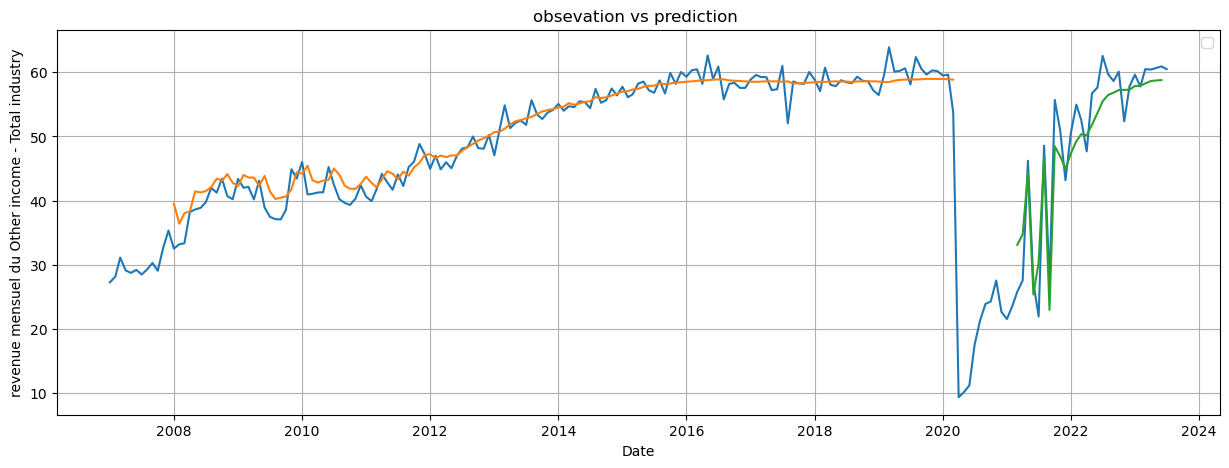

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.94 R2 
Score test : 0.30 R2 


Other income - Hotels


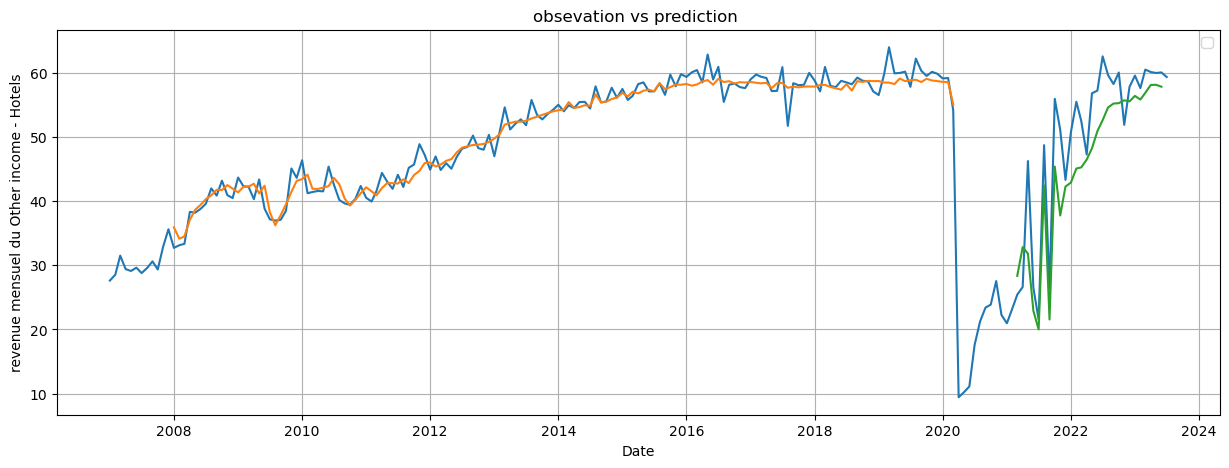

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.96 R2 
Score test : 0.13 R2 


Other income - Caravan parks and camping sites


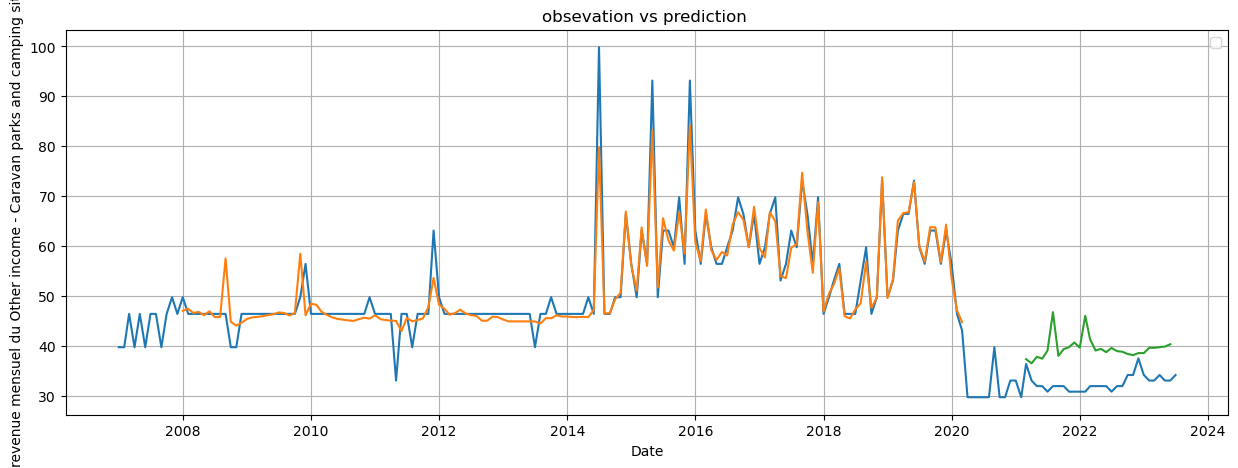

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.90 R2 
Score test : -25.43 R2 


Other income - Guest houses and guest farms


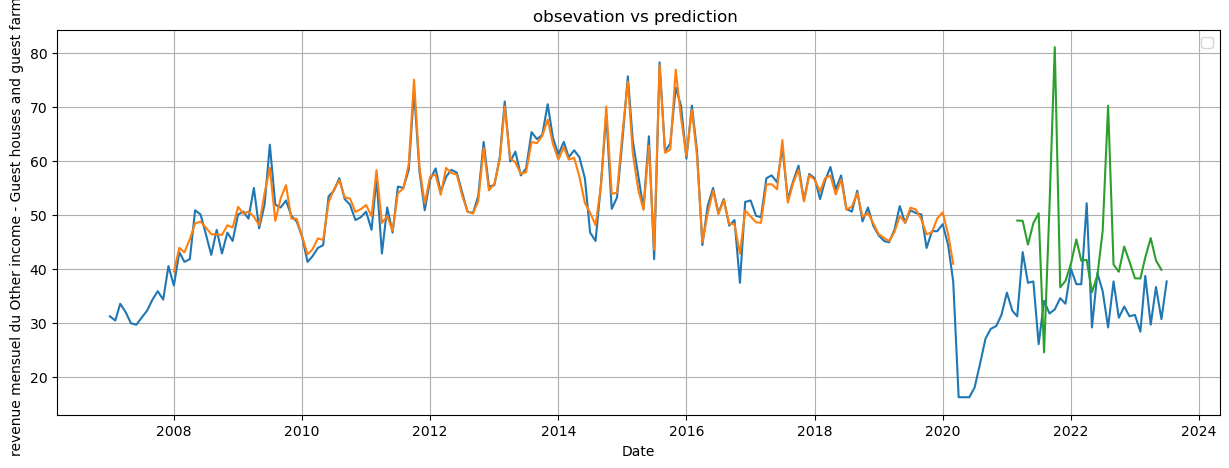

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.95 R2 
Score test : -7.11 R2 


Other income - Other accommodation


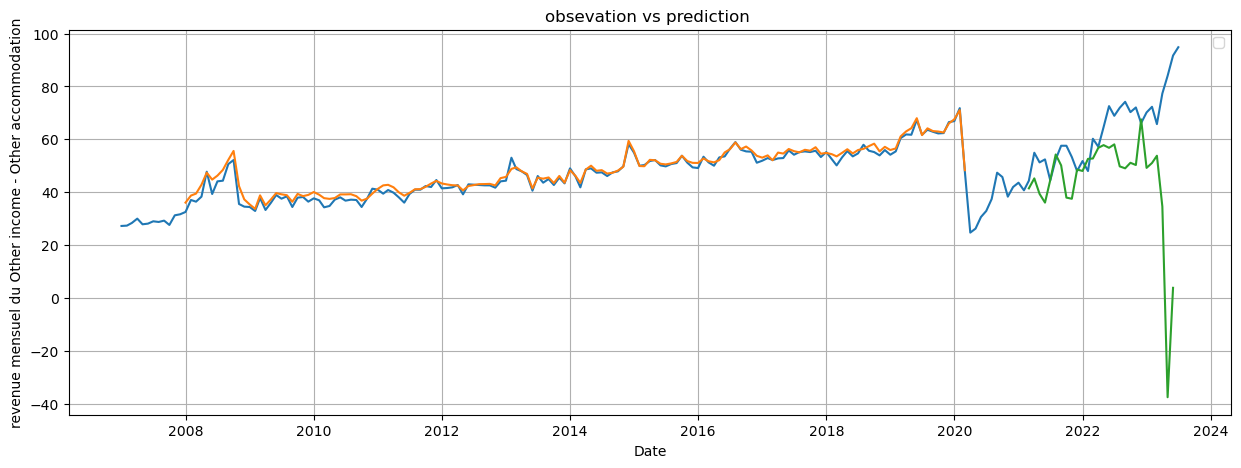

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.96 R2 
Score test : -6.00 R2 


Total income - Total industry


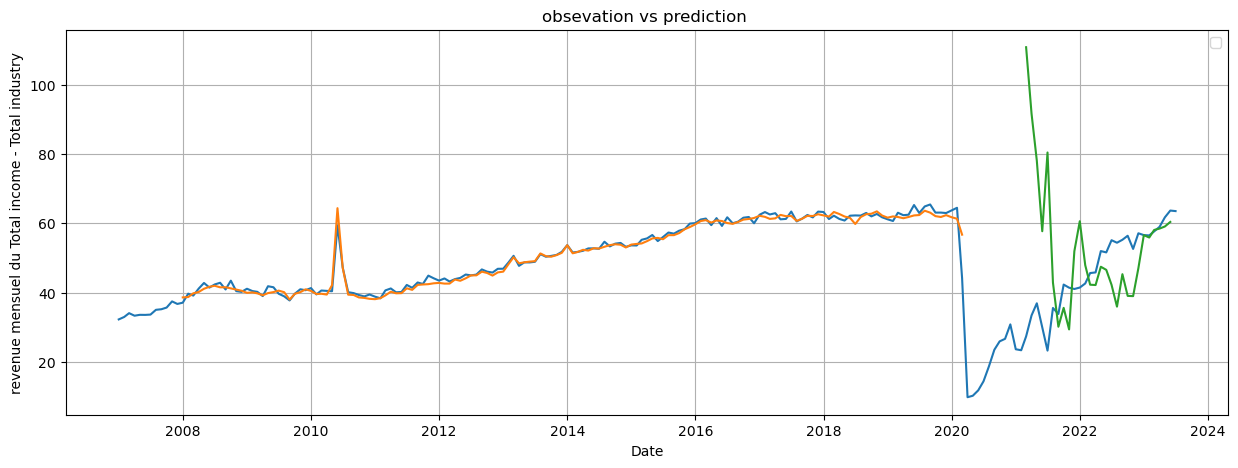

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.97 R2 
Score test : -4.23 R2 


Total income - Hotels


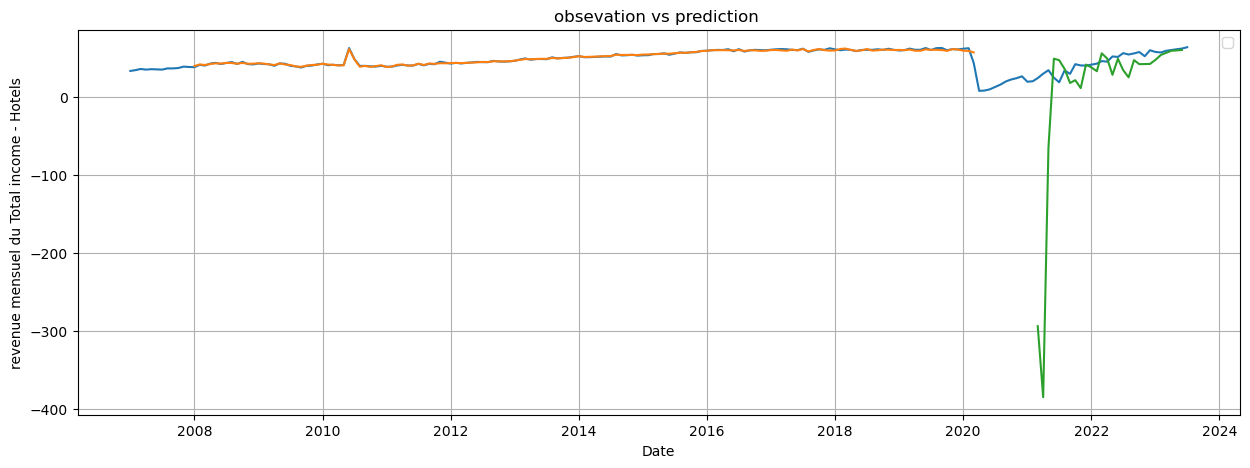

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.97 R2 
Score test : -69.34 R2 


Total income - Caravan parks and camping sites


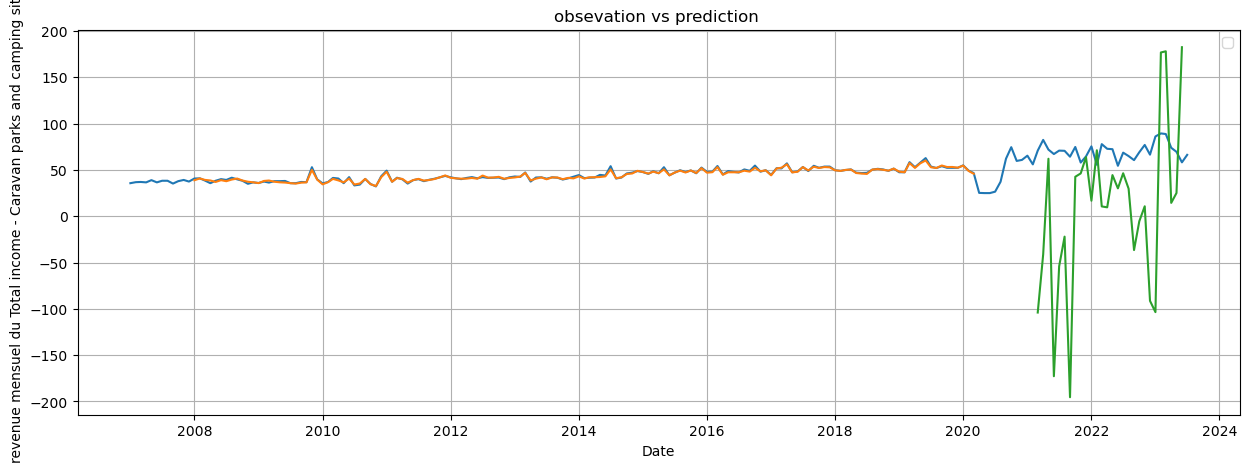

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.98 R2 
Score test : -148.77 R2 


Total income - Guest houses and guest farms


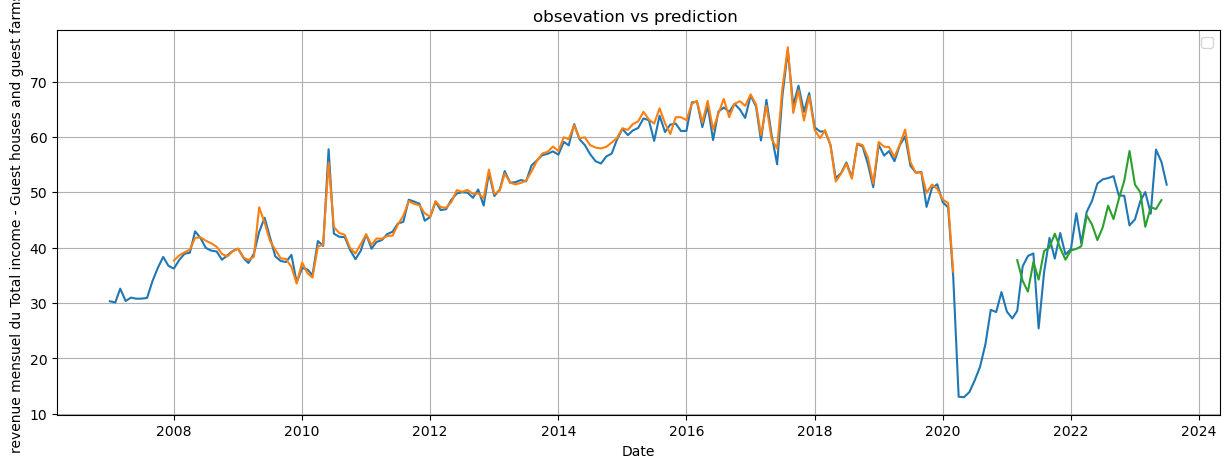

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.99 R2 
Score test : 0.25 R2 


Total income - Other accommodation


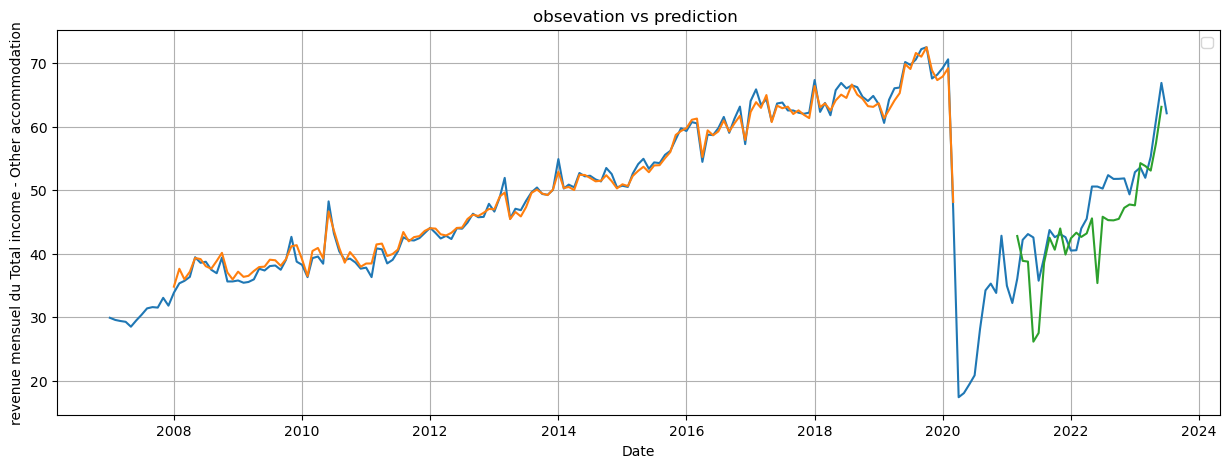

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.99 R2 
Score test : 0.31 R2 


Income per stay unit nights sold - Total industry


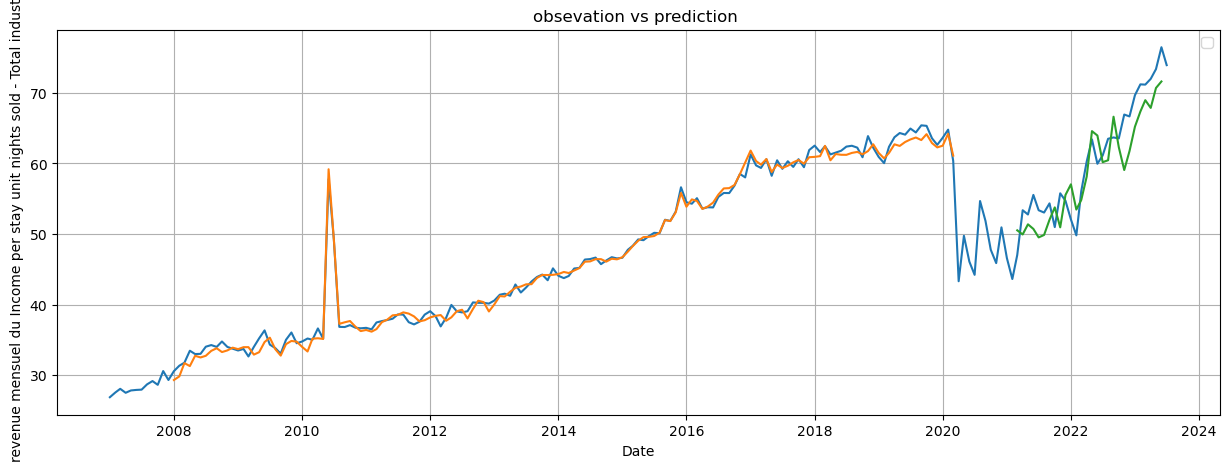

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.99 R2 
Score test : 0.69 R2 


Income per stay unit nights sold - Hotels


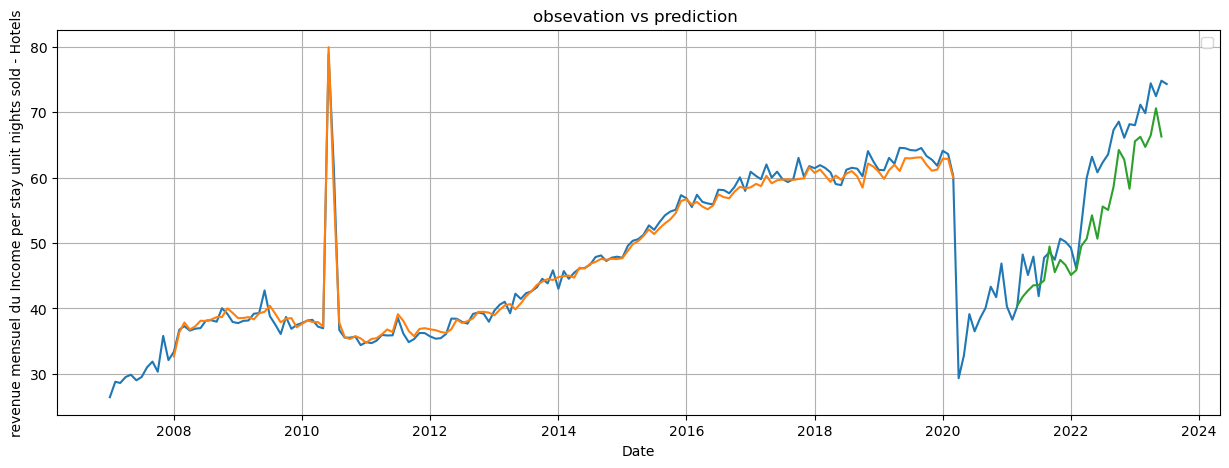

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.99 R2 
Score test : 0.56 R2 


Income per stay unit nights sold - Caravan parks and camping sites


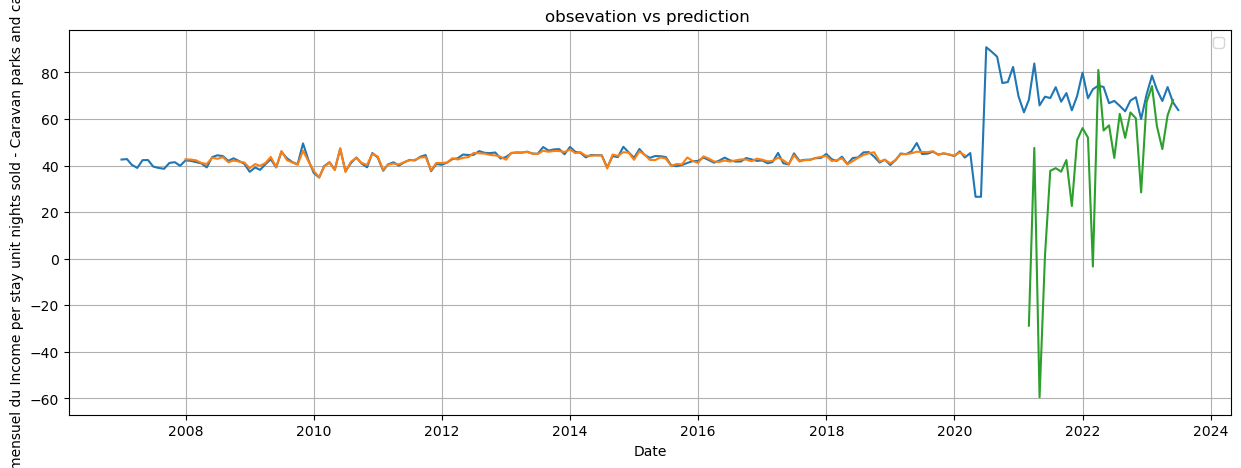

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.89 R2 
Score test : -68.55 R2 


Income per stay unit nights sold - Guest houses and guest farms


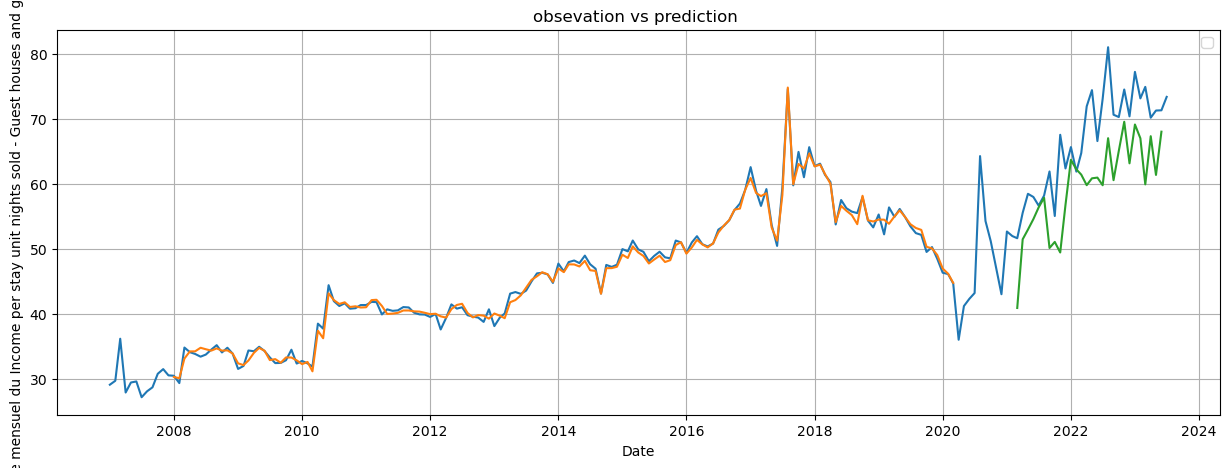

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.99 R2 
Score test : -0.84 R2 


Income per stay unit nights sold - Other accommodation


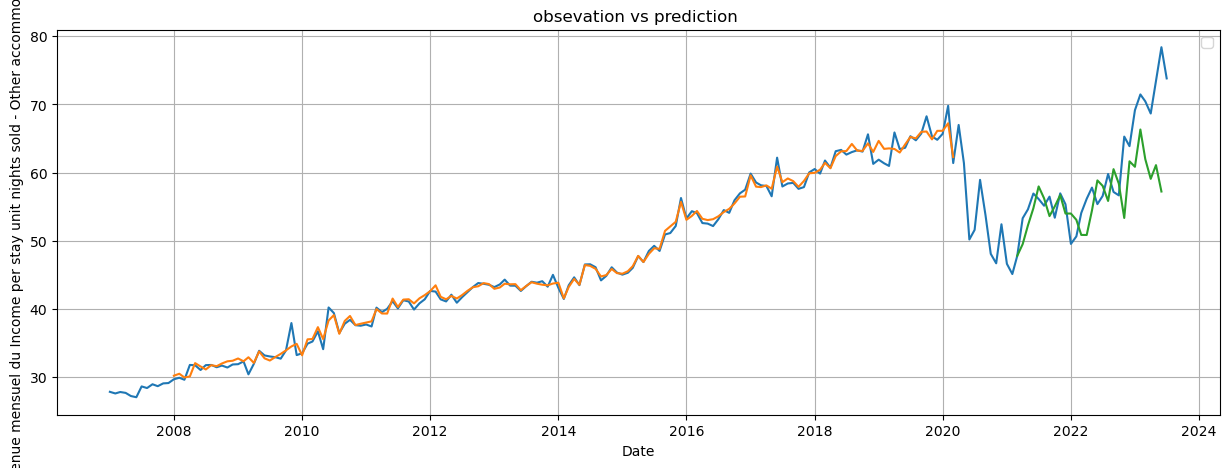

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.99 R2 
Score test : 0.16 R2 


Income from accommodation - Total industry


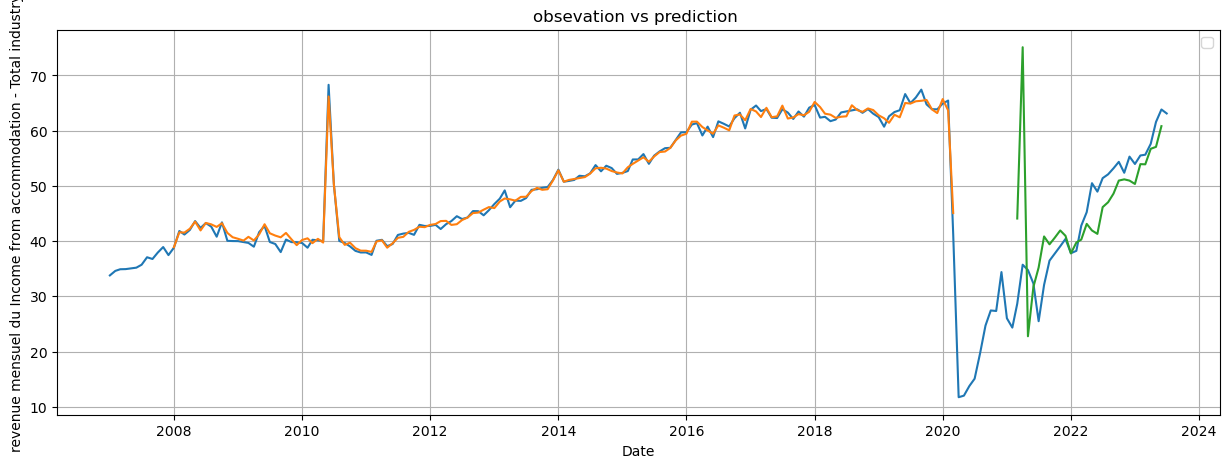

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.99 R2 
Score test : 0.20 R2 


Income from accommodation - Hotels


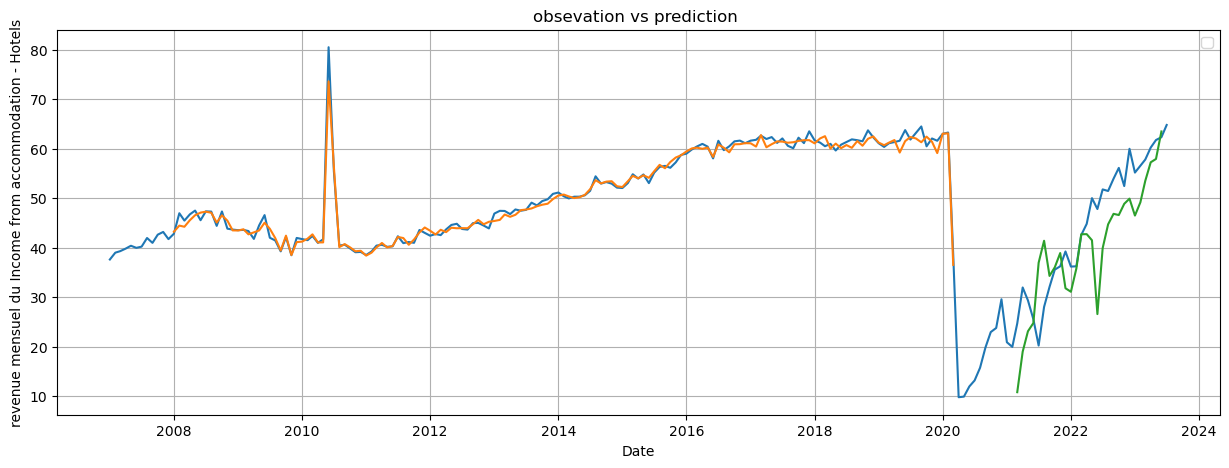

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.98 R2 
Score test : 0.47 R2 


Income from accommodation - Caravan parks and camping sites


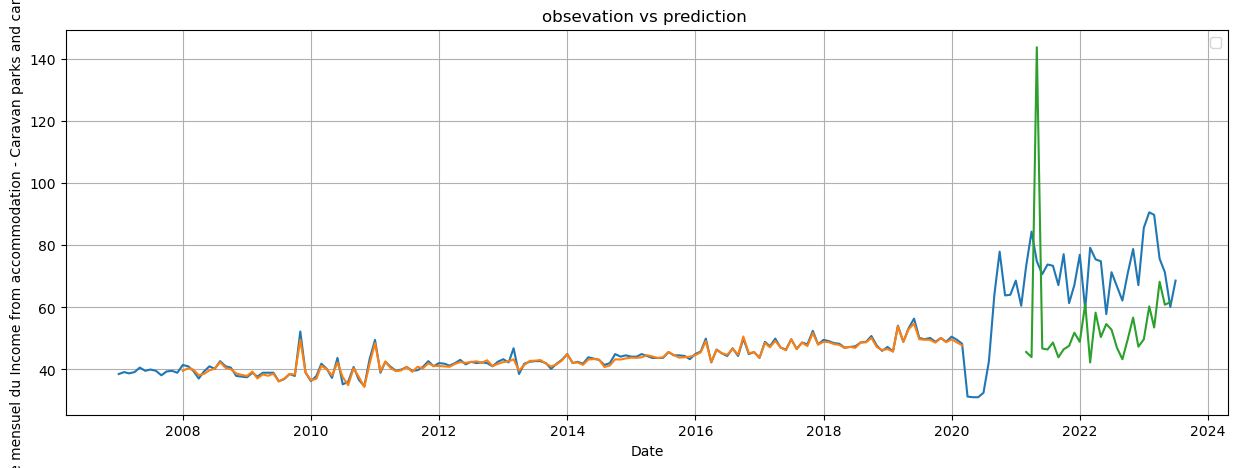

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.97 R2 
Score test : -9.32 R2 


Income from accommodation - Guest houses and guest farms


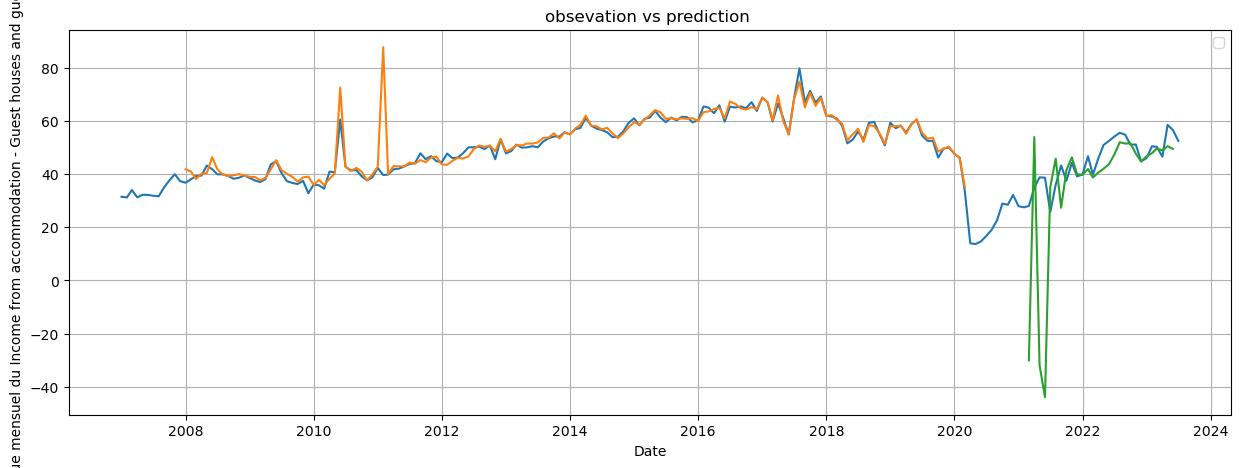

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.81 R2 
Score test : -8.17 R2 


Income from accommodation - Other accommodation


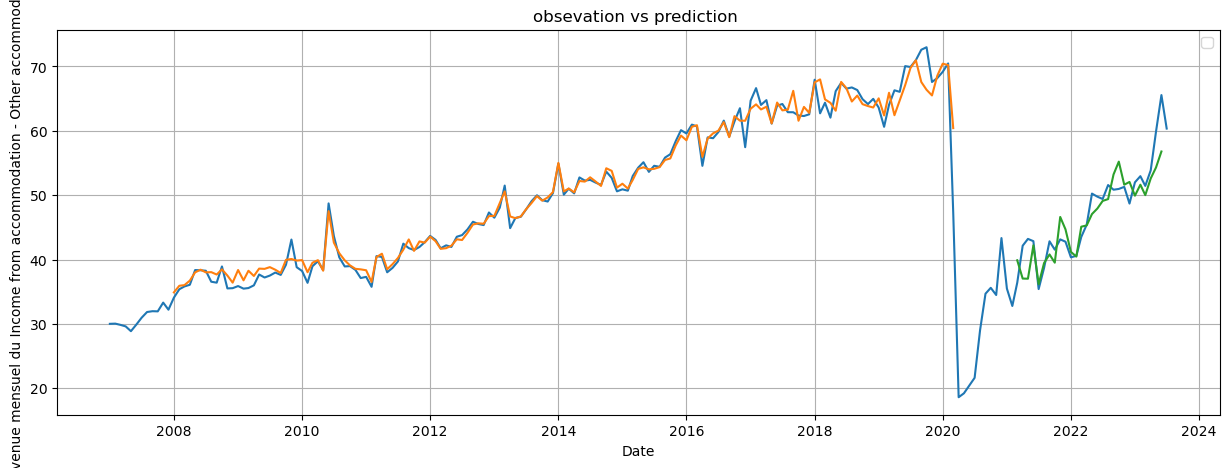

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.98 R2 
Score test : 0.63 R2 


Income from restaurant and bar sales - Total industry


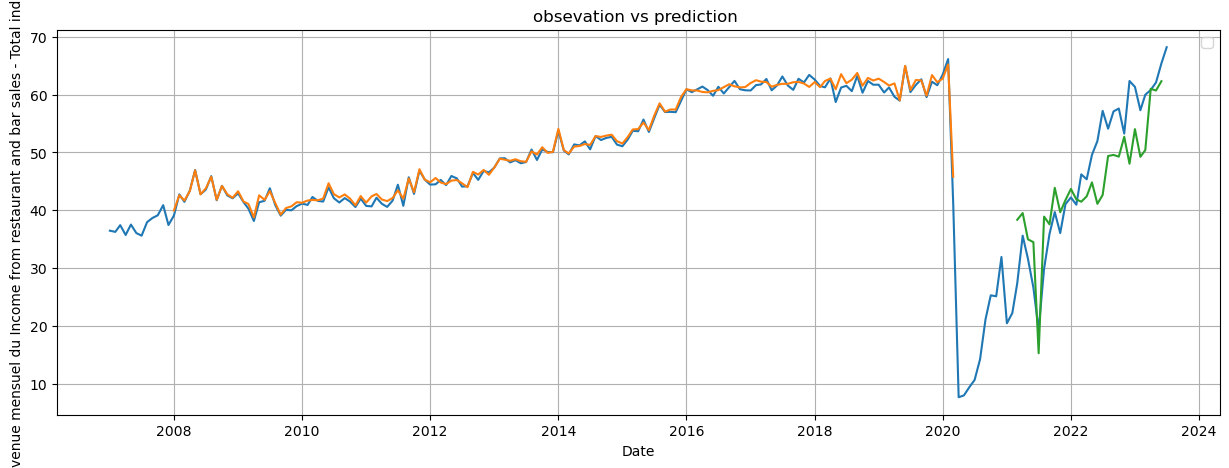

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.99 R2 
Score test : 0.58 R2 


Income from restaurant and bar sales - Hotels


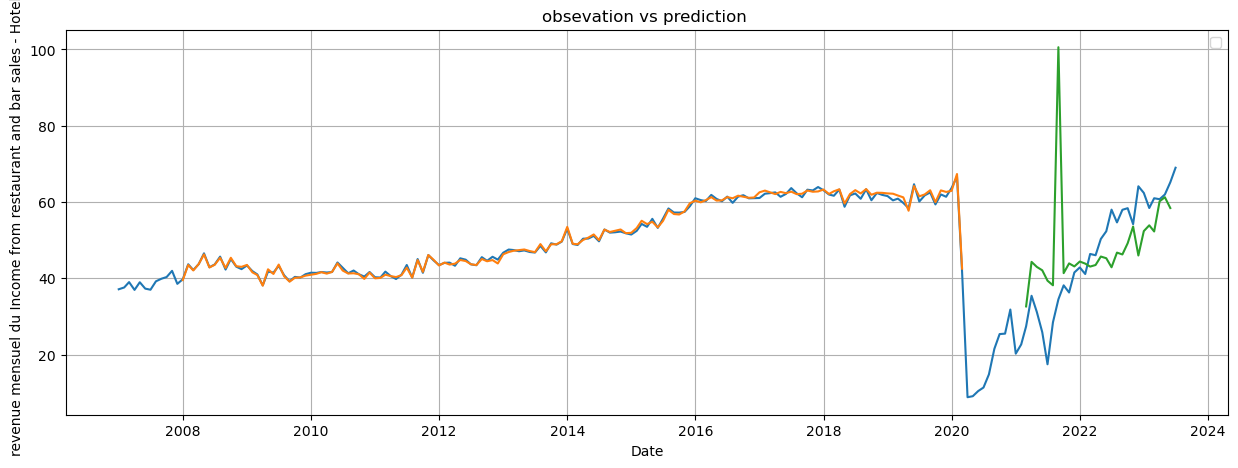

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 1.00 R2 
Score test : -0.30 R2 


Income from restaurant and bar sales - Caravan parks and camping sites


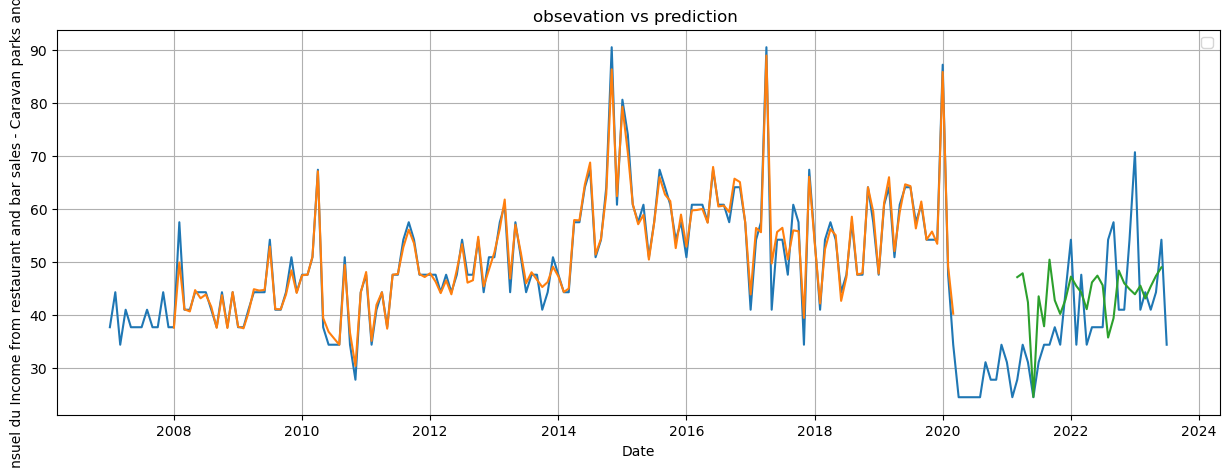

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.97 R2 
Score test : -0.22 R2 


Income from restaurant and bar sales - Guest houses and guest farms


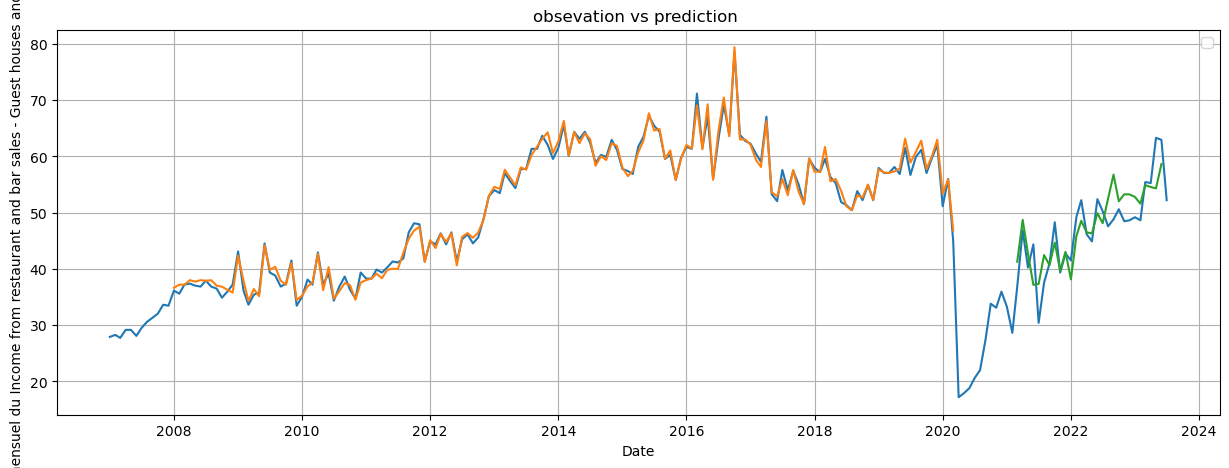

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Score train : 0.99 R2 
Score test : 0.41 R2 


Income from restaurant and bar sales - Other accommodation


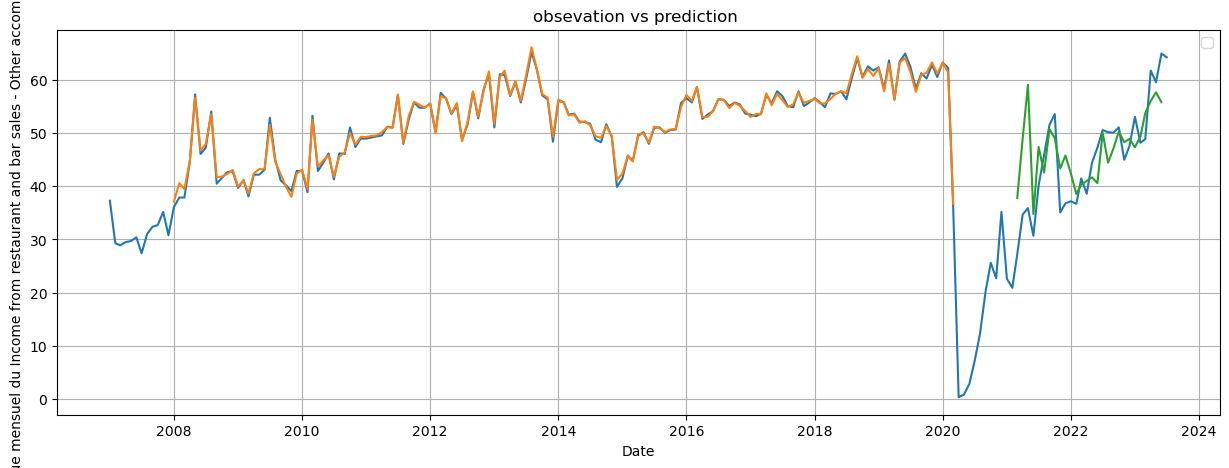

Score train : 0.99 R2 
Score test : 0.17 R2 


In [302]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
for m in models:
    print(f"\n\n{m['secteur']}")
    train_pred_plot = np.empty_like(df[m['secteur']])
    train_pred_plot[:] = np.nan
    train_pred_plot[lengh:lengh+len(m["train_pred"])] = m["train_pred"].reshape(-1)


    
    test_pred_plot = np.empty_like(df[m['secteur']])
    test_pred_plot[:] = np.nan
    test_pred_plot[len(m["train_data"])+(lengh) -1:len(df[m['secteur']])-1] = m["test_pred"].reshape(-1)
    
    
    #print(scaler.inverse_transform(df[s].values.reshape(-1, 1)))
    plt.figure(figsize=(15,5))
    plt.plot(df.index, scaler.inverse_transform(df[m['secteur']].values.reshape(-1, 1)))
    #plt.plot(scaler.inverse_transform(m["test_pred"]))
    plt.plot(df.index, train_pred_plot)
    plt.plot(df.index, test_pred_plot)
    plt.xlabel('Date')
    plt.ylabel(f"revenue mensuel du {m['secteur']}")
    plt.title('obsevation vs prediction ')
    plt.grid(True)
    plt.legend()
    plt.show()

    train_r2=r2_score(m["y_train_resclaled"][lengh:], m["train_pred"])

    test_r2=r2_score(m["y_test_resclaled"][lengh:], m["test_pred"])

    print("Score train : %.2f R2 " % train_r2)
    print("Score test : %.2f R2 " % test_r2)

In [303]:
for m in models:
    prediction=m["model"].predict(df["Other income - Total industry"][-12:])
print(scaler.inverse_transform(prediction)) 

1/1 [==============================] - 0s 35ms/step
[[58.490395]
 [57.409912]
 [58.889317]
 [56.1033  ]
 [56.661476]
 [58.412083]
 [56.65002 ]
 [59.24149 ]
 [59.20823 ]
 [59.30993 ]
 [59.419197]
 [59.23526 ]]


In [304]:
prediction1=[]
for secteur, m in zip(secteurs,models):
    pro=m['model'].predict(df[secteur][-12:])
    prediction1.append({'secteur': secteur,
                       'predict': scaler.inverse_transform(pro)
    })

1/1 [==============================] - 0s 33ms/step


In [305]:
for p in prediction1:
    p['MOIS']=['01-08-2023','01-09-2023','01-10-2023','01-11-2023','01-12-2023','01-01-2024','01-02-2024','01-03-2024','01-04-2024','01-05-2024','01-06-2024','01-07-2024']

In [306]:
print(prediction1[0])

{'secteur': 'Other income - Total industry', 'predict': array([[58.490395],
       [57.409912],
       [58.889317],
       [56.1033  ],
       [56.661476],
       [58.412083],
       [56.65002 ],
       [59.24149 ],
       [59.20823 ],
       [59.30993 ],
       [59.419197],
       [59.23526 ]], dtype=float32), 'MOIS': ['01-08-2023', '01-09-2023', '01-10-2023', '01-11-2023', '01-12-2023', '01-01-2024', '01-02-2024', '01-03-2024', '01-04-2024', '01-05-2024', '01-06-2024', '01-07-2024']}


In [ ]:
#df_pred = pd.DataFrame.from_dict(prediction1)


In [ ]:
#df_pred.head()

In [307]:
dfs =[]
for i in range(0,25):
    dfi = prediction1[i]['predict']
    mois = prediction1[i]['MOIS']
    secteur = prediction1[i]['secteur'] 
    
    list_pred= []
    for i in range(len(dfi)):
        list_pred.append(dfi[i][0])

    dict1 = {'predict': list_pred, 'month': mois,'secteur': secteur}
    #df_pr = pd.DataFrame(dict1)
    #df_pr.rename(columns = {'predict':f'{secteur}'}, inplace = True) 
    dfs.append(dict1)

In [ ]:
#prediction= pd.concat(dfs,axis=1)

In [ ]:
#prediction.head()

In [ ]:
#prediction = prediction.loc[:, ~prediction.columns[::-1].duplicated()[::-1]]
#prediction.shape

In [ ]:
#prediction1.set_index('month', inplace=True)


In [ ]:
#prediction1

In [ ]:
# dfi = df_pred['predict'][1]
# mois = df_pred['MOIS'][1]
# dict1 = {'predict': dfi, 'month': mois}
# list_mois= []
# for i in range(len(dfi)):
#     list_mois.append(dfi[i][0])

In [ ]:
#list_mois

In [308]:
print(dfs[0])



{'predict': [58.490395, 57.409912, 58.889317, 56.1033, 56.661476, 58.412083, 56.65002, 59.24149, 59.20823, 59.30993, 59.419197, 59.23526], 'month': ['01-08-2023', '01-09-2023', '01-10-2023', '01-11-2023', '01-12-2023', '01-01-2024', '01-02-2024', '01-03-2024', '01-04-2024', '01-05-2024', '01-06-2024', '01-07-2024'], 'secteur': 'Other income - Total industry'}


In [314]:
for m in dfs:
    m['moyen']=sum(m['predict'])/12

In [315]:
tab=[]
for i in range(25):
    d=dfs[i]['secteur']
    m=dfs[i]['moyen']
    dict1={'secteur':d,
          'moyen entrées':m}
    tab.append(dict1)
    

In [316]:
df_moy=pd.DataFrame.from_dict(tab)

In [317]:
df_moy

secteur  moyen entrées
0                       Other income - Total industry      58.252550
1                               Other income - Hotels      58.026214
2      Other income - Caravan parks and camping sites      24.896540
3         Other income - Guest houses and guest farms      23.215647
4                  Other income - Other accommodation      65.469109
5                       Total income - Total industry      57.239209
6                               Total income - Hotels      57.947613
7      Total income - Caravan parks and camping sites      64.046740
8         Total income - Guest houses and guest farms      54.663397
9                  Total income - Other accommodation      57.088512
10  Income per stay unit nights sold - Total industry      62.146309
11          Income per stay unit nights sold - Hotels      62.303132
12  Income per stay unit nights sold - Caravan par...      61.842754
13  Income per stay unit nights sold - Guest house...      63.498651
14  Income per stay unit nights sold - Other accom...      61.179454
15         Income from accommodation - Total industry      56.993106
16                 Income from accommodation - Hotels      57.552368
17  Income from accommodation - Caravan parks and ...      64.725137
18  Income from accommodation - Guest houses and g...      55.253713
19    Income from accommodation - Other accommodation      56.946912
20  Income from restaurant and bar sales - Total i...      58.426847
21      Income from restaurant and bar sales - Hotels      58.706137
22  Income from restaurant and bar sales - Caravan...      46.878220
23  Income from restaurant and bar sales - Guest h...      56.817557
24  Income from restaurant and bar sales - Other a...      56.849509

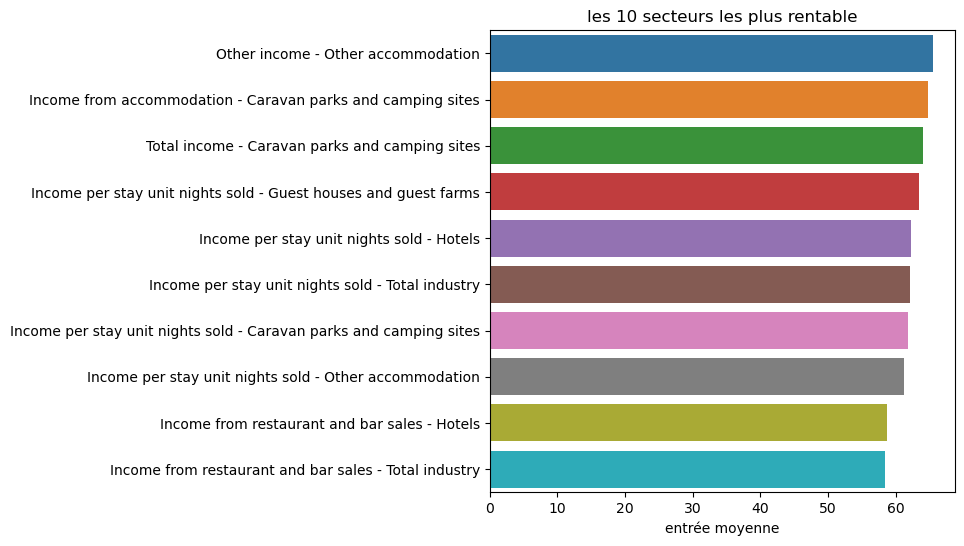

In [327]:
topentry=df_moy.sort_values(by='moyen entrées',ascending=False).head(10)
plt.figure(figsize=(6,6))
ax=sns.barplot(data=topentry,y='secteur',x='moyen entrées')
plt.title('les 10 secteurs les plus rentable')
plt.ylabel('')
plt.xlabel('entrée moyenne')
plt.savefig('secteur_rentable.png')
plt.show()


In [ ]:
import joblib
joblib.dump(secteurs,'secteur.pkl',compress=1)
joblib.dump(dfs,'prediction.pkl',compress=1)

##### 